### __BUSA3020 Group Assignment - Predicting Airbnb Listing Prices in Sydney__

--- 

**Due Date:** Friday, 3 June 2022 @ 11.59pm (Week 13)

**Overview:**   

- In the group assignment you will form a team of up to 3 students (minimum 2) and participate in a forecasting competition on Kaggle
- The goal is to predict listed property prices of Airbnb stays based on various Airbnb characteristics and regression models

- You will:  
    - Write a problem statement and perform Exploratory Data Analysis  
    - Clean up data, deal with categorical features and missing observations, and create new variables (feature engineering)  
    - Construct and tune forecasting models, produce forecasts and submit your predictions to Kaggle  
    - Each member of the team will record a video presentation of their work  
    - Marks will be awarded producing a prediction in the top 3 positions of their unit as well as for reaching the highest ranking on Kaggle amongst all teams.

**Instructions:** 

- Form a team of 3 students (minimum 2 students)  
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team in the competition [https://www.kaggle.com/t/caad5fd1f5134d86a15ab13d37d98d19](https://www.kaggle.com/t/caad5fd1f5134d86a15ab13d37d98d19)
    - Team leader to click on `team` and join and invite other team members to join
    - There are two MQBS BUSA units competing in this competition
    - Your **team's name must start** with your unit code, for instance you could have a team called BUSA3020_PR3D1CT0RS
- All team members should work on all the tasks listed below however   
    - **Choose a team member who will be responsible for one of each of the 3 tasks listed below**    

**Marks**: 

- Total Marks: 40
- Your mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work 
- 7 marks will be deducted from each Task for which there is no video presentation 

**Competition Marks:**
- 5 marks: Ranking in the top 3 places of your unit on Kaggle (make sure you name your team as instructed above)
- 2 marks: Reaching the first place in your unit  (make sure you name your team as instructed above)


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Can do this as many times as necessary while building their model  
2. On iLearn **only team leader to submit** this Jupyter notebook re-named `Group_Assignment_MQ_ID.ipynb` where MQ_ID is team leader's MQ ID number 
    - The Jupyter notebook must contain team members names/ID numbers, and team name in the competition
    - Provide answers to the 3 Tasks below in the allocated cells including all codes/outputs/writeups 
    - One 15 minute video recording of your work 
        - Each team member to provide a 5 minute presentation of the Task that they led (it is best to jointly record your video using Zoom)
        - When recording your video make sure your face is visible, that you share your Jupyter Notebook and explain everything you've done in the submitted Jupyter notebook on screen
        - 7 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
        
3. On iLearn each student needs to submit a file with their teammates' names, SID and a mark for their group effort (out of 100%)



---

**Fill out the following information**

For each team member provide name, Student ID number and which task is performed below

- Team Name on Kaggle: `Datalab`
- Team Leader and Team Member 1: `Dom Nasrabadi`

<div>
<img src="https://i.gifer.com/7lI8.gif" width="400"/>
</div>

---

## Task 1: Problem Description and Initial Data Analysis

1. Read the Competition Overview on Kaggle [https://www.kaggle.com/t/caad5fd1f5134d86a15ab13d37d98d19](https://www.kaggle.com/t/caad5fd1f5134d86a15ab13d37d98d19)
2. Referring to Competition Overview and the data provided on Kaggle write about a 500 words **Problem Description** focusing on key points that will need to be addressed as first steps in Tasks 2 and 3 below, using the following headings:
    - Forecasting Problem
    - Evaluation Criteria
    - Types of Variables/Features
    - Data summary and main data characteristics
    - Missing Values (only explain what you found at this stage)
    
Total Marks: 11


### Forecasting Problem

Airbnb is a global platform that disrupted how people use accomodation all over the world. It's gained enormous popularity since 2008 and has thousands of new listings added each year. Using Airbnb data, our objective is as below:
> Can we determine an accurate estimate of daily price for an Airbnb listing in Sydney, Australia?

Using the original dataset, we will attempt to perform a comprehensive exploratory data analysis, data cleaning, imputation, feature engineering & finally develop a machine learning model. There is 10,000 observations in the dataset with 7,000 in the training set and 3,000 in the test set. There is also 60 variables in total (including price), leaving us with 59 predictor variables to clean, manipulate and fit our model to. The first 3 observations are printed below for our inspection.

In [1]:
# import libs
import os 
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cbook
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# change working directory if it's not right
if os.getcwd() != '/Users/domnasrabadi/Desktop/busa3020/Group Assignment S1 2022/GroupAssignment':
    os.chdir('./GroupAssignment')

# read both datasets into memory
train_df = pd.read_csv('train.csv', index_col = 0)
test_df = pd.read_csv('test.csv', index_col = 0)
# add extra labels for later splitting
test_df['split'] = 'test'
train_df['split'] = 'train'

# show all columns and print a couple rows
pd.options.display.max_columns = None
# pd.options.display.max_rows = 10
pd.set_option('display.max_colwidth', 50)
all_df = pd.concat([train_df, test_df])

train_df.head(3)

name  \
ID                                                      
0                                 Manly Harbour House   
1   Unique Designer Rooftop Apartment in City Loca...   
2                       Studio Yindi @ Mosman, Sydney   

                                          description  \
ID                                                      
0   Beautifully renovated, spacious and quiet, our...   
1   Penthouse living at it best ... You will be st...   
2   An open plan apartment, which opens onto a spa...   

                                neighborhood_overview host_name  host_since  \
ID                                                                            
0   Balgowlah Heights is one of the most prestigio...     Heidi  2009-11-20   
1   The location is really central and there is nu...     Morag  2009-12-03   
2   Mosman is a smart, middle to upper class subur...      John  2010-11-06   

                         host_location  \
ID                                       
0   Sydney, New South Wales, Australia   
1   Sydney, New South Wales, Australia   
2   Sydney, New South Wales, Australia   

                                           host_about  host_response_time  \
ID                                                                          
0   I am a Canadian who has made Australia her hom...  within a few hours   
1   I am originally Scottish but I have made Sydne...      within an hour   
2   Faber est suae quisquae fortunae\r\n\r\nWe bec...  within a few hours   

   host_response_rate host_acceptance_rate host_is_superhost  \
ID                                                             
0                100%                  69%                 t   
1                100%                 100%                 f   
2                100%                  81%                 t   

   host_neighbourhood  host_listings_count  \
ID                                           
0           Balgowlah                  2.0   
1        Darlinghurst                  3.0   
2              Mosman                  1.0   

                                   host_verifications host_has_profile_pic  \
ID                                                                           
0   ['email', 'phone', 'reviews', 'jumio', 'offlin...                    t   
1   ['email', 'phone', 'facebook', 'reviews', 'jum...                    t   
2   ['email', 'phone', 'facebook', 'reviews', 'jum...                    t   

   host_identity_verified                             neighbourhood  \
ID                                                                    
0                       t     Balgowlah, New South Wales, Australia   
1                       t  Darlinghurst, New South Wales, Australia   
2                       t        Mosman, New South Wales, Australia   

   neighbourhood_cleansed  latitude  longitude                property_type  \
ID                                                                            
0                   Manly -33.80084  151.26378      Entire residential home   
1                  Sydney -33.87964  151.21680  Private room in rental unit   
2                  Mosman -33.81748  151.23484           Entire guest suite   

          room_type  accommodates       bathrooms  bedrooms  beds  \
ID                                                                  
0   Entire home/apt             6         3 baths       3.0   3.0   
1      Private room             2  1 private bath       1.0   1.0   
2   Entire home/apt             4          1 bath       1.0   1.0   

                                            amenities  minimum_nights  \
ID                                                                      
0   ["Hot water", "Coffee maker", "Heating", "Hair...               2   
1   ["Hot water", "Coffee maker", "Long term stays...               2   
2   ["Hot water", "Coffee maker", "Long term stays...               2   

    maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
ID     

### Evaluation Criteria

Since this is a regression problem, that is, where we are trying to predict a variable that is continuous/numeric (rental price) - we will be using the evaluation metric commonly known as ***Mean Squared Error (MSE)***. If our target variable was discrete, it would be a classification problem.   

MSE is defined as the sum of the squared residuals, divided by the number of observations in our dataset. If you take it's square root (RMSE), you can think of that as the average price that your prediction is off by. The red lines in the image below are the residuals, so it is favourable to make these distances as small as possible meaning our predictions become more accurate. 

It's worth noting that since each residual is squared, there is potential for outlier errors (those that are very high) to notably affect our MSE. This was a primary focus of mine in the later stages of fine tuning the model and building better features. The process of improving the model was very iterative and relied on forming hypotheses about the data and testing these ideas again and again checking the performance in cross-validation and then against the test data on Kaggle.

<center><img src="GroupAssignment/mse.png" width="350" height="200"/></center>

In the below plots, we can also see the distribution of our target variable price. It is very much right skewed, with few observations having very high prices.

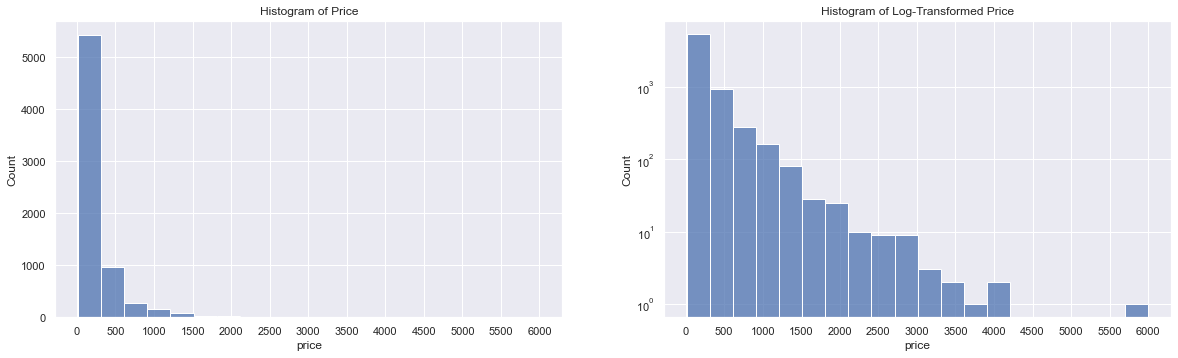

In [2]:
fig = plt.figure(figsize = (20,12))
sns.set()

fig.add_subplot(221)
plt.title('Histogram of Price')
sns.histplot(pd.to_numeric(all_df['price'].str.replace('[^.0-9]', '')), bins = 20)
plt.xticks(range(0,6500,500))

fig.add_subplot(222)
plt.title('Histogram of Log-Transformed Price')
sns.histplot(pd.to_numeric(all_df['price'].str.replace('[^.0-9]', '')), bins = 20)
plt.xticks(range(0,6500,500))
plt.yscale('log')

### Types of Variables/Features

There is a variety of data types present in our dataset, and we will use different techniques to explore each. The 2 main categories of data fall under: 
* **Quantitative/Numeric** data - can be continuous or discrete
* **Qualitative/Categorical** data - can be ordinal or nominal  

<center><img src="GroupAssignment/data_types.png" width="400" height="300"/></center>

We will assume the audience has knowledge in data type definitions. The 60 features in our airbnb dataset can be classified in the 3 below data types. Note: we classify dates as ordinal variables in this example as they follow a time order.

**Numeric Variables**
* `ID` - index for the dataset
* `price` - daily price in AUD
* `host_response_rate` - rate at which host responds to user queries
* `host_acceptance_rate` - rate at which host accepts booking requests
* `host_listings_count` - number of listings the host has (airbnb calculation)
* `accommodates` - maximum capacity of the listing
* `bathrooms` - has text, but will be converted to pure numeric column describing number of bathrooms
* `bedrooms` - number of bedrooms
* `beds` - number of beds
* `latitude` - coordinates using the World Geodetic System (WGS84)
* `longitude` - coordinates using the World Geodetic System (WGS84)
* `minimum_nights` - minimum number of night stay for the listing (calendar rules may be different)
* `maximum_nights` - maximum number of night stay for the listing (calendar rules may be different)
* `minimum_minimum_nights` - the smallest minimum_night value from the calender (looking 365 nights in the future)
* `maximum_minimum_nights` - the largest minimum_night value from the calender (looking 365 nights in the future)
* `minimum_maximum_nights` - the smallest maximum_night value from the calender (looking 365 nights in the future)
* `maximum_maximum_nights` - the largest maximum_night value from the calender (looking 365 nights in the future)
* `minimum_nights_avg_ntm` - the average minimum_night value from the calender (looking 365 nights in the future)
* `maximum_nights_avg_ntm` - the average maximum_night value from the calender (looking 365 nights in the future)
* `availability_30` - availability of the listing 30 days in the future as determined by the calendar
* `availability_60` - availability of the listing 60 days in the future as determined by the calendar
* `availability_90` - availability of the listing 90 days in the future as determined by the calendar
* `availability_365` - availability of the listing 365 days in the future as determined by the calendar
* `number_of_reviews` - number of reviews for the listing
* `number_of_reviews_ltm` - number of reviews for the listing in last 12 months
* `number_of_reviews_l30d` - number of reviews for the listing in last 30 days
* `review_scores_rating` - average rating given by users on overall attributes, scale between 0-5
* `review_scores_accuracy` - average rating given by users on accuracy attributes, scale between 0-5
* `review_scores_cleanliness` - average rating given by users on cleanliness attributes, scale between 0-5
* `review_scores_checkin` - average rating given by users on check-in factors, scale between 0-5
* `review_scores_communication` - average rating given by users on communication factors, scale between 0-5
* `review_scores_location` - average rating given by users on location factors, scale between 0-5
* `review_scores_value` - average rating given by users on value factors, scale between 0-5
* `calculated_host_listings_count` - number of listings the host has in the current scrape, in the city/region geography
* `calculated_host_listings_count_entire_homes` - number of Entire home/apt listings the host has in the current scrape, in the city/region geography
* `calculated_host_listings_count_private_rooms` - number of Private room listings the host has in the current scrape, in the city/region geography
* `calculated_host_listings_count_shared_rooms` - number of Shared room listings the host has in the current scrape, in the city/region geography
* `reviews_per_month` - number of reviews the listing has over the lifetime of the listing

**Nominal Variables** - A type of categorical data with no inherent order.
* `name` - name of the listing
* `description` - detailed description of the listing
* `neighborhood_overview` - host's description of the neighborhood
* `host_name` - name of the host (usually the first name)
* `host_location` - self reported location of the host
* `host_about` - self written description about the host
* `host_is_superhost` - binary flag if the host is a superhost
* `host_neighbourhood` - neighborhood component of the host location
* `host_verifications` - multi-valued list of various verification methods from the host
* `amenities` - multi-valued list of various amenities the property possesses as described by the host
* `host_has_profile_pic` - binary flag if the host has a profile picture
* `host_identity_verified` - binary flag if the identity of the host is verified
* `neighbourhood` - host inputted neighborhood of the listing
* `neighbourhood_cleansed` - the geocoded neighbourhood (uses lat & long)
* `property_type` - self selected property type
* `room_type` - entire place, private room, shared room, hotel
* `has_availability` - binary flag is the listing is available
* `license` - license/registration number for the property. Can also be exempt
* `instant_bookable` - binary flag indicating if a user can book without host having to approve, can indicate commercial listing

**Ordinal Variables** - A type of categorical data that has a natural order.
* `host_response_time` - timeframe of how long a host usually takes to respond to user queries/bookings
* `host_since` - date when host joined the airbnb service
* `first_review` - date of oldest review for the listing
* `last_review` - date of latest review for the listing

### Data Summary & Main Data Characteristics

As described above, our dataset has a variety of data types. The numeric data is also vastly varying on scale, for example, some columns are rates while others are coordinates which should be kept in their original form for best understanding differences between 2 points. The `info()` call below also gives a neat little summary of each column, its dtype and how many observations are non null. We can also confirm the overall dimensions are 10,000 rows and 60 variables with the `shape` call.  

Just by checking the summary below, you can see the variables in our dataset fall into several groups. Columns 0 to 2 are generic property information, which also contain the 2 of the largest columns as they give long form text descriptions about the property and neighborhood (a great source of insight for additional feature engineering). Columns 3 to 15 are data related to the host. Columns 16 to 25 contain some of the more important property data related to location and attributes of the house. The remaining columns are all related to the listing itself, including availability and reviews. These 4 over-arching categories of attributes will be helpful to know when we move onto feature engineering. 

In [3]:
all_df.shape

(10000, 61)

In [4]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          9998 non-null   object 
 1   description                                   9846 non-null   object 
 2   neighborhood_overview                         6943 non-null   object 
 3   host_name                                     10000 non-null  object 
 4   host_since                                    10000 non-null  object 
 5   host_location                                 9996 non-null   object 
 6   host_about                                    6110 non-null   object 
 7   host_response_time                            6821 non-null   object 
 8   host_response_rate                            6821 non-null   object 
 9   host_acceptance_rate                          6970 non-null   

In [5]:
nums = list(all_df._get_numeric_data().columns)
all_df[nums].describe()

host_listings_count      latitude     longitude  accommodates  \
count         10000.000000  10000.000000  10000.000000   10000.00000   
mean             12.871200    -33.853093    151.194656       3.62980   
std              38.223115      0.087999      0.100407       2.28063   
min               0.000000    -34.100680    150.630490       1.00000   
25%               1.000000    -33.895832    151.167258       2.00000   
50%               2.000000    -33.877735    151.212825       3.00000   
75%               5.000000    -33.814463    151.261212       4.00000   
max             457.000000    -33.392670    151.340410      16.00000   

          bedrooms         beds  minimum_nights  maximum_nights  \
count  9162.000000  9631.000000    10000.000000    10000.000000   
mean      1.777450     2.171633       43.501700      828.822200   
std       1.070244     1.649610       48.756685      451.594808   
min       1.000000     1.000000        1.000000        1.000000   
25%       1.000000     1.000000        2.000000      365.000000   
50%       1.000000     2.000000        7.000000     1125.000000   
75%       2.000000     3.000000       90.000000     1125.000000   
max      18.000000    39.000000     1125.000000     1162.000000   

       minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
count             9945.000000            10000.000000            10000.000000   
mean                42.506083               43.991300              907.023700   
std                 48.739458               48.155792              408.469203   
min                  1.000000                1.000000                1.000000   
25%                  2.000000                3.000000             1125.000000   
50%                  7.000000               10.000000             1125.000000   
75%                 90.000000               90.000000             1125.000000   
max               1125.000000             1125.000000             1162.000000   

       maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
count            9.945000e+03            10000.000000            1.000000e+04   
mean             2.376217e+06               43.257400            2.169292e+06   
std              7.138470e+07               48.461728            6.548772e+07   
min              1.000000e+00                1.000000            1.000000e+00   
25%              1.125000e+03                2.000000            1.125000e+03   
50%              1.125000e+03                7.000000            1.125000e+03   
75%              1.125000e+03               90.000000            1.125000e+03   
max              2.147484e+09             1125.000000            2.142625e+09   

       availability_30  availability_60  availability_90  availability_365  \
count     10000.000000     10000.000000     10000.000000       9933.000000   
mean          8.106200        20.726000        35.394000        137.551898   
std          10.373673        21.920519        33.900282        137.756841   
min           0.000000         0.000000         0.000000          0.000000   
25%           0.000000         0.000000         0.000000          0.000000   
50%           2.000000        13.000000        31.000000         88.000000   
75%          14.000000        39.000000        67.000000        286.000000   
max          30.000000        60.000000        90.000000        365.000000   

       number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
count       10000.000000           10000.000000            10000.000000   
mean           28.467700               5.147600                0.547500   
std            52.898448              11.161706                1.387637   
min             0.000000               0.000000                0.000000   
25%             2.000000               0.000000                0.000000   
50%             7.000000               0.000000                0.000000   
75%            30.000000               6.000000                0.0

In [6]:
cats = [item for item in list(all_df.columns) if item not in nums]
all_df[cats].drop(['name', 'description', 'neighborhood_overview'], axis = 'columns').describe()

host_name  host_since                       host_location  \
count      10000       10000                                9996   
unique      2963        2851                                 829   
top        David  2019-08-25  Sydney, New South Wales, Australia   
freq         108          96                                3026   

                                               host_about host_response_time  \
count                                                6110               6821   
unique                                               3652                  4   
top     Father of 4, I love real estate and accommodat...     within an hour   
freq                                                   93               4099   

       host_response_rate host_acceptance_rate host_is_superhost  \
count                6821                 6970             10000   
unique                 47                   91                 2   
top                  100%                 100%                 f   
freq                 4807                 1866              7648   

       host_neighbourhood                                 host_verifications  \
count                5825                                              10000   
unique                187                                                284   
top           Bondi Beach  ['email', 'phone', 'reviews', 'jumio', 'govern...   
freq                  345                                                856   

       host_has_profile_pic host_identity_verified  \
count                 10000                  10000   
unique                    2                      2   
top                       t                      t   
freq                   9962                   8641   

                                  neighbourhood neighbourhood_cleansed  \
count                                      6944                   9850   
unique                                      530                     38   
top     Bondi Beach, New South Wales, Australia                 Sydney   
freq                                        344                   2393   

             property_type        room_type bathrooms  \
count                 9877             9825      9990   
unique                  74                4        31   
top     Entire rental unit  Entire home/apt    1 bath   
freq                  4165             7063      5007   

                          amenities has_availability first_review last_review  \
count                         10000            10000         9420        9420   
unique                         9584                2         2560        1772   
top     ["Long term stays allowed"]                t   2020-01-01  2021-12-04   
freq                             23             9929           62         282   

       license instant_bookable    price  split  
count     5739            10000     7000  10000  
unique    4054                2      812      2  
top     Exempt                f  $150.00  train  
freq       940             6537      151   7000

### Missing Values

Missing values are a prevalent issue in almost all machine learning problems. Depending on the context of the data and the problem, we can deal with each variable accordingly. For example, notice that the review related columns are all missing the same amount. This is because some properties might get an overall review rating but users do not rate the property on each review subcategory, hence making sense why they would be blank. Very similarly, `first_review`,`last_review` and `reviews_per_month` would all be missing if that property has never received a review.  

In other examples, it could be user error/behaviour or data pipeline issues causing missing values. Depending on the reason, we can decide to either drop such values (row wise or column wise) or instead try an imputation technique. Since the dataset is only 10,000 rows, we might lose valuable information by dropping so we will impute where possible.  

For imputation, we often trial methods such as mode (or most commonly occuring) for categorical variables, and median/mean for numeric variables. In the later stages of my modelling process, I also changed some methods to be a constant such as 0 or 1, or even created an extra column indicating if that column had a missing value e.g. host response time was imputed with 'unknown response time'. Our final decision was based on the imputation technique that would lead to the lowest MSE.

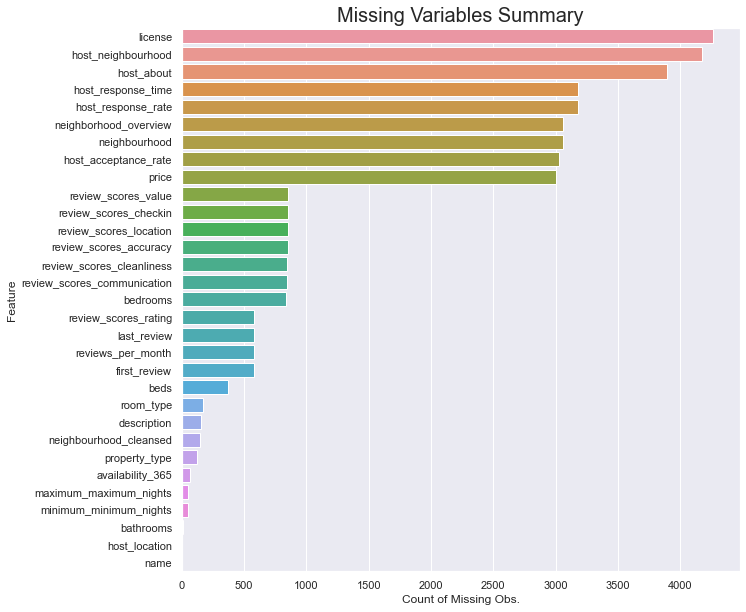

In [7]:
all_missing_vars = all_df.isnull().sum().sort_values(ascending = False)[all_df.isnull().sum()>0]

sns.set(rc={'figure.figsize':(10, 10)})
sns.barplot(x = all_missing_vars,
           y = all_missing_vars.index)
plt.xlabel('Count of Missing Obs.'); plt.ylabel('Feature')
plt.title('Missing Variables Summary', fontsize = 20)
plt.show()

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering
- In this task you will follow a set of instructions/questions listed below.
- Make sure you **explain** each step you do both in Markdown text and on your video.
    - Do not just read out your commands without exaplaining what they do and why you used them 

Total Marks: 11

**Task 2, Question 1**: Clean **all** numerical features and the target variable `price` so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

Mapping all the correct data types + formatting date columns.

In [8]:
# change percentage columns to decimal
all_df['host_response_rate'] = all_df['host_response_rate'].str.rstrip('%').astype('float') / 100.0
all_df['host_acceptance_rate'] = all_df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

# change price column to float
all_df['price'] = pd.to_numeric(all_df['price'].str.replace('[^.0-9]', ''))

# map binary columns appropriately
all_df['host_is_superhost'] = all_df['host_is_superhost'].map({'f':0, 't':1})
all_df['host_has_profile_pic'] = all_df['host_has_profile_pic'].map({'f':0, 't':1})
all_df['host_identity_verified'] = all_df['host_identity_verified'].map({'f':0, 't':1})
all_df['has_availability'] = all_df['has_availability'].map({'f':0, 't':1})
all_df['instant_bookable'] = all_df['instant_bookable'].map({'f':0, 't':1})

# map date columns appropriately 
all_df['host_since_year'] = pd.to_datetime(all_df['host_since']).dt.year
all_df['host_since'] = -(pd.to_datetime(all_df['host_since']) -  pd.to_datetime("now")).dt.days
all_df['first_review'] = -(pd.to_datetime(all_df['first_review']) -  pd.to_datetime("now")).dt.days
all_df['last_review'] = -(pd.to_datetime(all_df['last_review']) -  pd.to_datetime("now")).dt.days

# clean bathroom column and convert to float
all_df['bathrooms'] = all_df['bathrooms'].str.extract(r'(\d+(?:\.\d+)?)').astype('float')

`(Task 2, Question 1 Text Here - insert more cells as required)`

**Task 2, Question 3**: Impute missing values for all features in both training and test datasets.   
(2 marks)

Impute for room type and stay related columns.  

There is some context dependent logic below that is being used to impute for example if the property type is an entire home or townhouse, we can safely say that the room type is 'Entire home/apt' rather than the other values.

In [9]:
# impute room type depending on prop type
mask1 = (all_df['property_type']==np.nan) & all_df['room_type'].isnull()
mask2 = (all_df['property_type'].isin(['Entire residential home', 'Entire townhouse', 'Entire cottage'])) & all_df['room_type'].isnull()
mask3 = (all_df['property_type']=='Room in boutique hotel') & all_df['room_type'].isnull()

all_df.loc[mask1, 'room_type'] = 'Private room'
all_df.loc[mask2, 'room_type'] = 'Entire home/apt'
all_df.loc[mask3, 'room_type'] = 'Hotel room'
all_df['room_type'] = all_df['room_type'].fillna('Private room') # anything else is priv room

In [10]:
# imputing missing cols with common sense substitution from other column
all_df['minimum_minimum_nights'] = all_df['minimum_minimum_nights'].fillna(all_df['minimum_nights'])
all_df['maximum_maximum_nights'] = all_df['maximum_maximum_nights'].fillna(all_df['maximum_nights'])
all_df['availability_365'] = all_df['availability_365'].fillna(all_df['availability_90']*4) # can also fiddle with just 1 instead of 4 (did analysis)

# feature engineer for not reviewed before hosts
all_df['host_has_not_accepted_before'] = (all_df['host_acceptance_rate'].isnull()).astype(int)
all_df['has_not_been_reviewed_before'] = (all_df['first_review'].isnull()).astype(int)
all_df['host_has_not_replied_before'] = (all_df['host_response_rate'].isnull()).astype(int)

Variety of imputation techniques were used below but these gave the best results. Other techniques included using mean, median, constant values, zero values, values from other columns and dropping instances.

In [11]:
# impute nulls with 0 as context appropriate
# Edit: changed to 1
all_df['bathrooms'] = all_df['bathrooms'].fillna(1)

In [12]:
# fill na's for host response time
all_df['host_response_time'] = all_df['host_response_time'].fillna('no response time')

# host only has this listing
all_df['host_single_listing'] = (all_df['host_listings_count']==1).astype('int')

In [13]:
# review scores 
rev_cols = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
            'review_scores_communication', 'review_scores_location', 'review_scores_value']
for col in rev_cols:
    all_df[col] = all_df[col].fillna(value = all_df['review_scores_rating'])

In [14]:
# bed and bedroom
bed_cols = ['beds', 'bedrooms', ]
for col in bed_cols:
    all_df[col] = all_df[col].fillna(value = 0) 

`(Task 2, Question 3 Text Here - insert more cells as required)`

**Task 2, Question 2** Create at least 4 new features from existing features which contain multiple items of information, e.g. creating `email`,  `phone`, `reviews`, `jumio`, etc. from feature `host_verifications`.  
(2 marks)

Create features based on license of the property, dates of reviews and host registration and finally checking is the listing is possibly managed by a professional group rather than individuals.

In [15]:
# convert license to binary var : exempt vs rest
all_df['license_exempt_flag'] = all_df['license'].map({'Exempt':1})
all_df['license_exempt_flag'] = all_df['license_exempt_flag'].fillna(0)
all_df['PID_license_flag'] = [1 if x == True else 0 for x in all_df["license"].str.lower().str.contains('pid')]
all_df.drop(['license'], axis = 1, inplace = True)

In [16]:
# convert dates to time differences + add covid features
all_df['host_joined_after_covid_flag'] = pd.to_datetime(all_df['host_since']) > pd.to_datetime('2020-02-15')
all_df['host_joined_after_covid_flag'] = all_df['host_joined_after_covid_flag'].map({False:0, True:1})
all_df['first_rev_after_covid_flag'] = pd.to_datetime(all_df['first_review']) > pd.to_datetime('2020-02-15')
all_df['first_rev_after_covid_flag'] = all_df['first_rev_after_covid_flag'].map({False:0, True:1})

This custom functions checks for multiple capital letters in the `host_name` column which most often indicates the host is a group or professional organisation eg Luxury Properties. Most individuals only use their first name so it's not 100% accurate but works good enough for our purposes.

In [17]:
# checking if stay is professionally managed by seeing number of capital letters (not fully reliable but will get 90%)
def check_host(message):
    x = sum(1 for c in message if c.isupper())
    if x > 1:
        return 1
    else:
        return 0
    
all_df['host_is_pro_managed'] = all_df['host_name'].apply(check_host)
all_df['host_neigh_provided'] = all_df['host_neighbourhood'].isnull().astype('int')

# drop columns that will not be useful
all_df.drop(['name','host_name', 'host_location', 'host_neighbourhood'], axis = 1, inplace = True)

`geopy` is one the most useful packages for anything related to location - we use it multiple times in this project. This first example allows us to map suburbs based on lat and long which is useful for the small number of missing neighborhood observations we had. 

In [18]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

# find missing vals in neighborhood cleansed col
missing_nb = all_df[all_df['neighbourhood_cleansed'].isna()][['neighbourhood_cleansed', 'neighbourhood', 'latitude', 'longitude']]

# create list of coordinates from the missing dataframe above
filled_nb = list(missing_nb['latitude'].astype('string') + "," + missing_nb['longitude'].astype('string'))

filled_nb_list = []

for i in zip(missing_nb['neighbourhood'].str.split(',').index, missing_nb['neighbourhood'].str.split(',')):
    index = i[0]
    locat = i[1]
    
    try:
        filled_nb_list.append(locat[0]) # use suburb from longer neighbourhood column if its there
    except:
        co_ord = missing_nb.loc[index]['latitude'].astype('str') + "," + missing_nb.loc[index]['longitude'].astype('str')
        location = geolocator.reverse(co_ord)
        loc_raw = location.raw['address'] # if its not, use the geopy api to get it from lat and long
        try:
            filled_nb_list.append(loc_raw['suburb'])
        except:
            try:
                filled_nb_list.append(loc_raw['town'])
            except:
                try:
                    filled_nb_list.append(loc_raw['borough'])
                except:
                    print('suburb doesnt exist - ', loc_raw)
                
# impute new neighbourhood for the 150 missing vals
new_suburbs = pd.DataFrame(filled_nb_list).set_index(missing_nb.index)[0]
all_df['neighbourhood_cleansed'].fillna(new_suburbs, inplace = True)

# drop neighbourhood col
all_df.drop(['neighbourhood'], axis = 'columns', inplace = True)

The *walkscore* of a suburb is and index that assigns a numerical walkability score including factors such as availability of general amenities, access to transport and natural features.  

This measure is a good proxy for overall suburb friendliness and practicality in some aspects. I applied for an API Key to make calls and use the data live however it was limited to only 5000 calls a day and was quite time intensive so rather I scraped the scores from all Sydney suburbs and stored them in a spreadsheet which I then joined to our main dataframe. Website is below:  


https://www.walkscore.com/AU-NSW/Sydney.

In [19]:
walk_df = pd.read_excel('walkscores.xlsx')
walk_df.columns = ['neighbourhood_cleansed', 'walkscore']
scores = all_df.merge(walk_df, 'left')[['neighbourhood_cleansed', 'walkscore']]
all_df['walkscore'] = scores['walkscore']

Checking the most popular verification methods + a count of all methods and creating columns for them in our dataset.

In [20]:
# feature engineering for verification column
all_df['verf_cnt'] = [len(method) for method in all_df["host_verifications"].str.lower().str.replace("\[|\]|\'", "").str.split(",").values]
all_df['has_facebook'] = [1 if x == True else 0 for x in all_df["host_verifications"].str.lower().str.contains('facebook')]
all_df['has_jumio'] = [1 if x == True else 0 for x in all_df["host_verifications"].str.lower().str.contains('jumio')]
all_df['has_email'] = [1 if x == True else 0 for x in all_df["host_verifications"].str.lower().str.contains('email')]
all_df['has_review'] = [1 if x == True else 0 for x in all_df["host_verifications"].str.lower().str.contains('review')]
all_df['has_phone'] = [1 if x == True else 0 for x in all_df["host_verifications"].str.lower().str.contains('phone')]
all_df['has_google'] = [1 if x == True else 0 for x in all_df["host_verifications"].str.lower().str.contains('google')]
all_df['has_govt'] = [1 if x == True else 0 for x in all_df["host_verifications"].str.lower().str.contains('government')]

# drop host verifications
all_df.drop(['host_verifications'], axis = 'columns', inplace = True)

Based on my room & property type analysis, there are some variations which have a higher mean and median price than others, while some are also much lower. We add these to our feature set as binary columns on the following matches.

In [21]:
rp_mean_price = all_df.groupby(['room_type', 'property_type'])['price'].mean().round()
rp_median_price = all_df.groupby(['room_type', 'property_type'])['price'].median().round()
rp_cnt = all_df[['room_type', 'property_type']].value_counts().sort_index()

pd.options.display.max_rows = None
print(pd.DataFrame(rp_mean_price).join(pd.DataFrame(rp_cnt)))
pd.options.display.max_rows = 10

                                                     price     0
room_type       property_type                                   
Entire home/apt Barn                                 275.0     1
                Boat                                 842.0     7
                Bus                                  125.0     1
                Camper/RV                            500.0     5
                Campsite                             200.0     1
                Casa particular                      110.0     1
                Cave                                 370.0     1
                Dome house                           300.0     1
                Earth house                          140.0     1
                Entire bungalow                      253.0    36
                Entire cabin                         233.0    19
                Entire condominium (condo)           248.0   148
                Entire cottage                       429.0    70
                Entire gu

In [22]:
# feature engineering for property type
unique_props = ['barn', 'boat', 'cave', 'camper', 'farm stay', 'entire villa', 'entire residential home', 'aparthotel', 'hotel']
budget_props = ['bed and breakfast', 'hostel', 'earth', 'room in guesthouse', 'room in residential home']

all_df['unique_prop_type'] = [1 if x == True else 0 for x in all_df["property_type"].str.lower().str.contains('|'.join(unique_props))]
all_df['budget_prop_type'] = [1 if x == True else 0 for x in all_df["property_type"].str.lower().str.contains('|'.join(budget_props))]

# drop property type now
all_df.drop('property_type', axis = 'columns', inplace = True)

The below code loops through each high priced, low priced and popular amenity list as found by the research in the EDA section. This is to give an indication of if that listing's amenities are most similar to a higher priced/luxury listing, or those of a budget listing. 

These lists were found by checking which amenities are associated with a higher average price. The pre-work for this step was done in a previous notebook but involved creating binary variables for various amenities e.g. **had_miele** & **not_have_miele** then calculating the average for each category. The most distinct splits are therefore listed below.

In [23]:
# feature engineering 3 new cols - cnt of special amenities
hp_amens = ['parking on premise', 'fireplace', 'bathtub', 'private patio or balcony', 'pool', 'cable tv', 'bbq grill', 'hot tub', 
           'lake access', 'Pool table', 'Sonos Bluetooth sound system', 'Miele', 'walk-in closet', 'barbecue utensils', 
           'high chair', 'beach_essentials']
all_amens = ['Wifi', 'Long term stays allowed', 'Essentials', 'Smoke alarm','Kitchen', 'Washer', 'Hangers', 'Iron', 'Hair dryer', 'Shampoo',
       'Hot water', 'TV', 'Heating', 'Dedicated workspace','Dishes and silverware', 'Dryer', 'Refrigerator', 'Microwave',
       'Cooking basics', 'Air conditioning']
lp_amens = ['free street parking', 'luggage dropoff allowed', 'lock on bedroom', 'lockbox', 'shower gel', 'elevator', 'kettle', 'single level']

all_df['highp_amen_cnt'] = 0
all_df['pop_amen_cnt'] = 0
all_df['lowp_amen_cnt'] = 0

for amen in hp_amens:
    all_df.loc[all_df['amenities'].str.lower().str.contains(amen.lower()), 'highp_amen_cnt'] += 1

for amen in all_amens:
    all_df.loc[all_df['amenities'].str.lower().str.contains(amen.lower()), 'pop_amen_cnt'] += 1
        
for amen in lp_amens:
    all_df.loc[all_df['amenities'].str.lower().str.contains(amen.lower()), 'lowp_amen_cnt'] += 1

Creating features for some of the most important amenities in each price range. This is an extenstion of the above, this time I decide to actually include the **dummified feature for certain amenities** as they have moderate predictive power in this form.  

The last line also creates a column indicating the % of high priced amenities apart of the total amenities for that listing.

In [24]:
# feature engineering for amenities
all_df['amenities_cnt'] = [len(method) for method in all_df["amenities"].str.replace("\[|\]|\'", "").str.split(",").values]

# add features for unique and cheap amenities

all_df['amen_prem_park'] = [1 if x == True else 0 for x in all_df["amenities"].str.lower().str.contains('parking on premise')]
all_df['amen_ind_fireplace'] = [1 if x == True else 0 for x in all_df["amenities"].str.lower().str.contains('fireplace')]
all_df['amen_bathtub'] = [1 if x == True else 0 for x in all_df["amenities"].str.lower().str.contains('bathtub')]
all_df['amen_private_patio'] = [1 if x == True else 0 for x in all_df["amenities"].str.lower().str.contains('private patio or balcony')]
all_df['amen_pool'] = [1 if x == True else 0 for x in all_df["amenities"].str.lower().str.contains('pool')]
all_df['amen_cable'] = [1 if x == True else 0 for x in all_df["amenities"].str.lower().str.contains('cable tv')]
all_df['amen_bbq'] = [1 if x == True else 0 for x in all_df["amenities"].str.lower().str.contains('bbq grill')]
all_df['amen_hottub'] = [1 if x == True else 0 for x in all_df["amenities"].str.lower().str.contains('hot tub')]
all_df['amen_bbg_gear'] = [1 if x == True else 0 for x in all_df["amenities"].str.lower().str.contains('barbecue utensils')]
all_df['amen_child_toys'] = [1 if x == True else 0 for x in all_df["amenities"].str.lower().str.contains('books and toys')]
all_df['amen_high_chair'] = [1 if x == True else 0 for x in all_df["amenities"].str.lower().str.contains('high chair')]
all_df['amen_beach_ess'] = [1 if x == True else 0 for x in all_df["amenities"].str.lower().str.contains('beach essentials')]

all_df['amen_st_park'] = [1 if x == True else 0 for x in all_df["amenities"].str.lower().str.contains('free street parking')]
all_df['amen_lug_dropoff'] = [1 if x == True else 0 for x in all_df["amenities"].str.lower().str.contains('luggage dropoff allowed')]
all_df['amen_bedlock'] = [1 if x == True else 0 for x in all_df["amenities"].str.lower().str.contains('lock on bedroom')]
all_df['amen_lockbox'] = [1 if x == True else 0 for x in all_df["amenities"].str.lower().str.contains('lockbox')]
all_df['amen_elevator'] = [1 if x == True else 0 for x in all_df["amenities"].str.lower().str.contains('elevator')]
all_df['amen_singlev'] = [1 if x == True else 0 for x in all_df["amenities"].str.lower().str.contains('single level')]
all_df['amen_kettle'] = [1 if x == True else 0 for x in all_df["amenities"].str.lower().str.contains('kettle')]
all_df['amen_hostgreet'] = [1 if x == True else 0 for x in all_df["amenities"].str.lower().str.contains('host greets you')]

# Calculate proportion of total amenities that are 'higher priced'
all_df['highp_amen_prop'] = round(all_df['highp_amen_cnt']/all_df['amenities_cnt'],2)

Creating dummies for 60 of the most popular suburbs. Trialled this concept with a different number e.g. 10, 100, everything and nothing. 60 is a good compromise.

In [25]:
# DUMMIES FOR TOP 60 MOST POPULAR SBURBS

pop_suburbs = list(all_df['neighbourhood_cleansed'].value_counts()[:60].index)

for sub in pop_suburbs:
    all_df['sub_' + sub.replace(" ", "_")] = [1 if x == True else 0 for x in all_df["neighbourhood_cleansed"]==sub]

One of the most valuable sources of insight in the dataset is the larger text columns. In this specific dataset, we have 3 such columns including description, neighbourhood overview and host neighbourhood overview. Using the module from the `vaderSentiment` library, we can score each textual extract from a score of -1 to 1 **indicating how negative or positive the sentiment is within that text**.  

This turned out to have material effect on our model's performance but is could have been possibly further improved if we were able to use review data from customers of the listing. Descriptions and neighbourhood overviews will often be biased as they are written by the host however assuming most are honest and impartial, it still gives some predictive power.  

Below are some articles and tutorials on using this powerful library:  
https://www.analyticsvidhya.com/blog/2021/06/vader-for-sentiment-analysis/  
https://medium.com/@piocalderon/vader-sentiment-analysis-explained-f1c4f9101cd9  

*NOTE: The following cells take some time to run so instead I saved the results of a previous run to an excel and then read them in to speed my modelling process. If you would like to try it yourself, simply comment out my excel line and uncomment the rest of the cells.*

In [26]:
# creating a function for the next part
def clean_desc(series):
    """
    This function removes html text from a column (should be the description column)
    Inputs: 
        A series without null values
    Outputs:
        A bag of words from the series
    """
    html = ['<br /><br />', '<b>', '</b>', '<br />', 'Ä', 'ö', '√', 'Ñ', ';', ':', '<', '>', '/', '\\', '=', '-', '¥', 'Äö√Ñ√¥' ]
    for tag in html:
        series = series.str.replace(tag, '')
        
    return series

# feature engineering using above intuition
#all_df['desc_beach'] = 
all_df['description'] = clean_desc(all_df['description'])

all_df['description_length'] = all_df['description'].map(str).apply(len)
all_df['desc_beach'] = all_df['description'].str.lower().str.contains('|'.join(['beach', 'water view', 'waterfront', 'ocean', 'coast'])).map({True:1, False:0, np.nan:0})
all_df['desc_amen'] = all_df['description'].str.lower().str.contains('|'.join(['spa', 'sauna', 'steam room', 'gym'])).map({True:1, False:0, np.nan:0})
all_df['desc_view'] = all_df['description'].str.lower().str.contains('|'.join(['view', 'sunset', 'sunrise', 'panorama', 'panoramic', 'infinity', 'levels', 'overlook'])).map({True:1, False:0, np.nan:0})
all_df['desc_lux'] = all_df['description'].str.lower().str.contains('|'.join(['estate','acre','lounge', 'deck', 'restaurant', 'balcony', 'renovated', 'modern', 'space', 'renovation', 'alfresco', 'designer'])).map({True:1, False:0, np.nan:0})
all_df['desc_transport'] = all_df['description'].str.lower().str.contains('|'.join(['minute', 'available', 'shared', 'walking','train', 'station', 'bus', 'cbd'])).map({True:1, False:0, np.nan:0})

# THE CODE BELOW TAKES A WHILE TO RUN HENCE I HAVE USED EXCEL INSTEAD
# Get sentiment score for description and neighboorhood overview
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# desc_sentiment = []
# for i in all_df['description']:
#     desc_sentiment.append(SentimentIntensityAnalyzer().polarity_scores(str(i))['compound'])
# all_df['desc_sentiment'] = pd.Series(desc_sentiment)

# neigh_sentiment = []
# for i in all_df['neighborhood_overview']:
#     neigh_sentiment.append(SentimentIntensityAnalyzer().polarity_scores(str(i))['compound'])
# all_df['neigh_sentiment'] = pd.Series(neigh_sentiment)

# host_neigh_sent = []
# for i in all_df['host_about']:
#     host_neigh_sent.append(SentimentIntensityAnalyzer().polarity_scores(str(i))['compound'])
# all_df['host_about_sentiment'] = pd.Series(host_neigh_sent)

# all_df[['desc_sentiment', 'neigh_sentiment', 'host_about_sentiment']].to_excel('sentiment_scores.xlsx')

sentiment_df = pd.read_excel('sentiment_scores.xlsx', index_col = 0)
all_df = all_df.join(sentiment_df).copy()


In [27]:
exp_lat = [-33.977696,
-33.983353,
-33.989201,
-33.991842,
-33.978549,
-33.964214,
-33.939094,
-33.935071,
-33.930274,
-33.920968,
-33.915001,
-33.915849,
-33.913614,
-33.911022,
-33.906451,
-33.903587,
-33.891459,
-33.892676,
-33.879146,
-33.873718,
-33.865029,
-33.859503,
-33.850456,
-33.844058,
-33.835353,
-33.839878,
-33.843046,
-33.847018,
-33.852903,
-33.850651,
-33.868973,
-33.869690,
-33.865112,
-33.873992,
-33.866709,
-33.870952,
-33.870530,
-33.867814,
-33.863572,
-33.863264,
-33.857650,
-33.882320,
-33.857132,
-33.929798,
-33.889944,
-33.867841,
-33.851706,
-33.848177,
-33.845931,
-33.842259,
-33.847712,
-33.845917,
-33.842103,
-33.842174,
-33.822557,
-33.815283,
-33.819420,
-33.806476,
-33.809528,
-33.802982,
-33.798890,
-33.800174,
-33.807448,
-33.818812,
-33.796970,
-33.801214,
-33.781750,
-33.776296,
-33.771480,
-33.763881,
-33.757994,
-33.753890,
-33.737696,
-33.712838,
-33.699854,
-33.676179,
-33.656264,
-33.648387,
-33.643315,
-33.635445,
-33.629578,
-33.610213,
-33.597467,
-33.601720,
-33.592676,
-33.616697,
-33.636034,
-33.648470,
-33.658635,
-33.663135,
-33.663420,
-33.661062,
-33.655525,
-33.650202,
-33.652795,
-33.644935,
-33.89318,
-33.63151,
-33.77904,
-33.82199,
-33.51341,
-33.75837,
-33.78945,
-33.867448,
-33.866719,
-33.874093,
-33.879372,
-33.85503,
-33.840582,
-33.596905,
-33.816517,
-34.008981,
-34.013238,
-34.04521,
-34.013287,
-34.017857,
-34.007698,
-33.991254,
-33.998121,
-34.078135,
-34.081702,
-34.08401,
-33.766286,
-33.517781]

exp_lon = [151.228079,
151.230515,
151.235563,
151.238403,
151.251755,
151.251985,
151.262270,
151.261380,
151.259680,
151.257626,
151.261164,
151.267136,
151.266393,
151.270119,
151.269946,
151.268228,
151.276042,
151.284334,
151.282448,
151.283521,
151.283440,
151.284655,
151.286993,
151.284930,
151.280265,
151.278882,
151.281823,
151.280447,
151.273639,
151.266851,
151.268921,
151.253410,
151.252892,
151.244632,
151.239971,
151.235620,
151.230513,
151.227327,
151.226874,
151.217714,
151.214644,
151.263990,
151.268733,
151.259667,
151.278405,
151.238425,
151.218060,
151.219562,
151.224025,
151.216129,
151.203984,
151.229883,
151.233531,
151.250998,
151.251008,
151.248691,
151.223979,
151.229773,
151.237887,
151.236042,
151.282680,
151.273797,
151.284354,
151.293565,
151.288467,
151.297651,
151.290060,
151.293345,
151.294203,
151.301670,
151.299910,
151.297206,
151.306128,
151.301321,
151.308997,
151.315598,
151.323064,
151.326921,
151.330597,
151.332489,
151.339247,
151.331517,
151.324709,
151.316941,
151.320675,
151.317227,
151.306587,
151.302993,
151.307918,
151.310278,
151.305815,
151.300923,
151.293713,
151.286889,
151.277286,
151.283766,
151.26875,
151.31457,
151.12056,
151.19739,
150.90451,
151.24892,
151.28486,
151.250007,
151.253684,
151.245861,
151.250331,
151.274354,
151.248566,
151.324065,
151.249134,
151.191907,
151.202607,
151.159248,
151.113493,
151.115124,
151.086539,
151.128968,
151.135473,
151.129342,
151.14592,
151.152535,
150.653403,
151.176154]

exp_coords = pd.DataFrame({
    'latitude':exp_lat,
    'longitude':exp_lon
})

exp_coords

latitude   longitude
0   -33.977696  151.228079
1   -33.983353  151.230515
2   -33.989201  151.235563
3   -33.991842  151.238403
4   -33.978549  151.251755
..         ...         ...
119 -34.078135  151.129342
120 -34.081702  151.145920
121 -34.084010  151.152535
122 -33.766286  150.653403
123 -33.517781  151.176154

[124 rows x 2 columns]

The next cell captures the distance from any listing to the **nearest popular beach, expensive/famous street or lookout point**. Many houses in coastal suburbs are often higher priced however those with water views or overlooking coastal landscapes have especially higher prices.  

This feature proved to be very effective however took a long time to create as it involved manually grabbing coordinates from google maps using hand picked locations as well as checking industry articles on streets and beaches that are most desired. https://www.kaggle.com/code/camnugent/geospatial-feature-engineering-and-visualization/notebook.

After several iterations of testing, I also added more **inland locations with river views or those likely to be located on larger acreages**.  

*NOTE: The following cells take some time to run so instead I saved the results of a previous run to an excel and then read them in to speed my modelling process. If you would like to try it yourself, simply comment out my excel line and uncomment the rest of the cells.*

In [28]:
# dist_list = []
# import geopy.distance
# hot_locs = exp_coords.copy()
# all_coords = all_df[['latitude', 'longitude']].copy()

# for index, row in all_coords.iterrows():
#     airbnb_loc = (row['latitude'], row['longitude'])
#     # this is our constant to compare against so we can grab min in below loop
#     starting_diff = geopy.distance.geodesic(airbnb_loc, (hot_locs.loc[0]['latitude'], hot_locs.loc[0]['longitude'])).km
#     # will use this to change and appen to min dist list
#     diff = starting_diff
    
#     for index, row in hot_locs.iterrows():
#         hotloc_coord = (row['latitude'], row['longitude'])
#         if geopy.distance.geodesic(airbnb_loc, hotloc_coord).km < diff:
#             diff = round(geopy.distance.geodesic(airbnb_loc, hotloc_coord).km,3)
    
#     dist_list.append(diff)
    
# dist_df = pd.DataFrame(dist_list)
# dist_df.columns = ['dist']
# dist_df.to_excel('final_distances2.xlsx')
dist_df = pd.read_excel('final_distances2.xlsx', index_col = 0)

In [29]:
mtrway_lat = [
    -33.829912,
-33.842568,
-33.857561,
-33.865162,
-33.877167,
-33.81623,
-33.797706,
-33.758232,
-33.754883,
-33.738626,
-33.751075,
-33.950768,
-33.938074,
-33.925247,
-33.941688
]

mtrway_lon = [
    151.018103,
151.043708,
151.072131,
151.094252,
151.12962,
150.963331,
150.854017,
151.049254,
150.953926,
150.917531,
150.845879,
150.876465,
150.913459,
150.921265,
150.942502
]

highway_coords = pd.DataFrame({
    'latitude':mtrway_lat,
    'longitude':mtrway_lon
})

The next feature was created based on several reports (https://www.jstor.org/stable/24860906) indicating how house prices closer to motorways are often priced lower due to noise and air pollution among other factors. The 2 below links show the various entry and toll points on NSW major motorways which we used to create another distance feature - i.e. the distance to the closest motorway entry or point.  

*References*.  
https://tollguru.com/toll-wiki/sydney-toll-roads-motorways-bridges-tunnels  
https://www.ozroads.com.au/NSW/Freeways/Freeways.htm

In [30]:
# dist_list = []
# import geopy.distance
# all_coords = all_df[['latitude', 'longitude']].copy()

# for index, row in all_coords.iterrows():
#     airbnb_loc = (row['latitude'], row['longitude'])
#     # this is our constant to compare against so we can grab min in below loop
#     starting_diff = geopy.distance.geodesic(airbnb_loc, (highway_coords.loc[0]['latitude'], highway_coords.loc[0]['longitude'])).km
#     # will use this to change and appen to min dist list
#     diff = starting_diff
    
#     for index, row in highway_coords.iterrows():
#         hotloc_coord = (row['latitude'], row['longitude'])
#         if geopy.distance.geodesic(airbnb_loc, hotloc_coord).km < diff:
#             diff = round(geopy.distance.geodesic(airbnb_loc, hotloc_coord).km,3)
    
#     dist_list.append(diff)
    
# hway_dist_df = pd.DataFrame(dist_list)
# hway_dist_df.columns = ['hway_dist']
# hway_dist_df.to_excel('hway_distances.xlsx')

hway_dist_df = pd.read_excel('hway_distances.xlsx', index_col = 0)

The above features are the a subset of those tried over the many iterations. Other trialed features did not lead to notable model improvement so they were discarded in the final model but below is a summary of other methods attempted:
* dummy variables for top 200 amenities
* dummy variables for all suburbs
* dummary variables for top 10 and lowest 10 priced suburbs
* calculated distance from listing to CBD
* calculated clusters and assigned labels as features
* added binary columns for words appearing in the long text columns (many iterations)
* used SMOTE as a way of dealing with imbalanced target but this did not help
* one shot text classifiers https://www.reddit.com/r/datascience/comments/ut9gtz/classify_texts_using_known_categories_nlp/
* many more

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 


Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, you could group then map `property_type` into 5 basic types + 'other': [entire rental unit, private room, entire room, entire towehouse, shared room, other] and then encode.  
(2 marks)

In [31]:
cols_to_drop = ['description', 'neighborhood_overview', 'neighbourhood_cleansed', 'host_about', 'amenities']

# note: the below were gotten from the correlation matrix as 0 corr 
    # https://vishesh-gupta.medium.com/correlation-in-xgboost-8afa649bd066
    # https://stats.stackexchange.com/questions/266267/should-one-be-concerned-about-multi-collinearity-when-using-non-linear-models

new_df = all_df.drop(cols_to_drop, axis = 1).copy()
new_df_dums = pd.get_dummies(new_df)

In [32]:
new_df_dums = new_df_dums.join(dist_df['dist']).copy()
hway_dist_df.columns = ['hway_dist']
new_df_dums = new_df_dums.join(hway_dist_df['hway_dist']).copy()
#new_df_dums = new_df_dums.join(cbd_dist_df['cbd_dist']).copy()

In [33]:
new_df_dums.shape

(10000, 174)

`(Task 2, Question 4 Text Here - insert more cells as required)`

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [34]:
train = new_df_dums[new_df_dums['split_train']==1].copy()
train.drop(['split_test', 'split_train'], axis = 'columns', inplace = True)

test = new_df_dums[new_df_dums['split_test']==1].copy()
test.drop(['split_test', 'split_train'], axis = 'columns', inplace = True)

X_train = train.drop('price', axis = 'columns')
y_train = train['price']
X_test = test.drop('price', axis = 'columns')

print(X_test.shape)
print(X_train.shape)

(3000, 171)
(7000, 171)


`(Task 2, Question 5 Text Here - insert more cells as required)`

**Task 2, Question 6**: Perform exploratory data analysis to measure the relationship between the features and the target and write up your findings. 
(2 marks)

In [35]:
## Task 2, Question 6 Code Here

The below image is a screenshot from the excel output using the below code.  
`new_df_dums.corr().to_excel('new_df_dums_corr2.xlsx', sheet_name='Sheet2')`  

It was useful in helping identify multicollinearity in our dataset and removing some variables that were not necessarily improving the model but even detrimenting it. Since such a table cannot be displayed easily in Jupyter, the screenshot is attached below but the video also shows how I used it for our purposes.  

In summary, you can notice some pockets of similar colours clustered around each other which indicate features that are strongly correlated with one another - these are columns that are candidates to be removed and help with model simplicity.

<center><img src="GroupAssignment/corr.png" width="800" height="300"/></center>

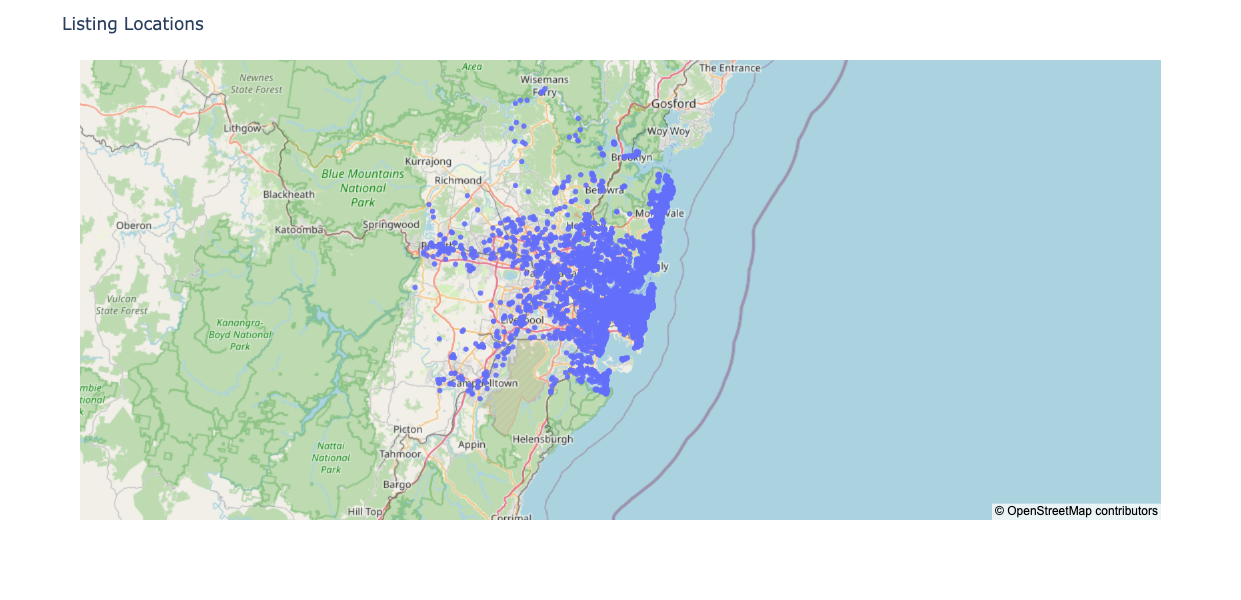

In [57]:
import plotly.express as px #https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html
fig = px.scatter_mapbox(all_df, lat="latitude", lon="longitude", width=1200, height=600, opacity = 0.9, hover_data = ['price', 'neighbourhood_cleansed'])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title=f'Listing Locations')
fig.show()

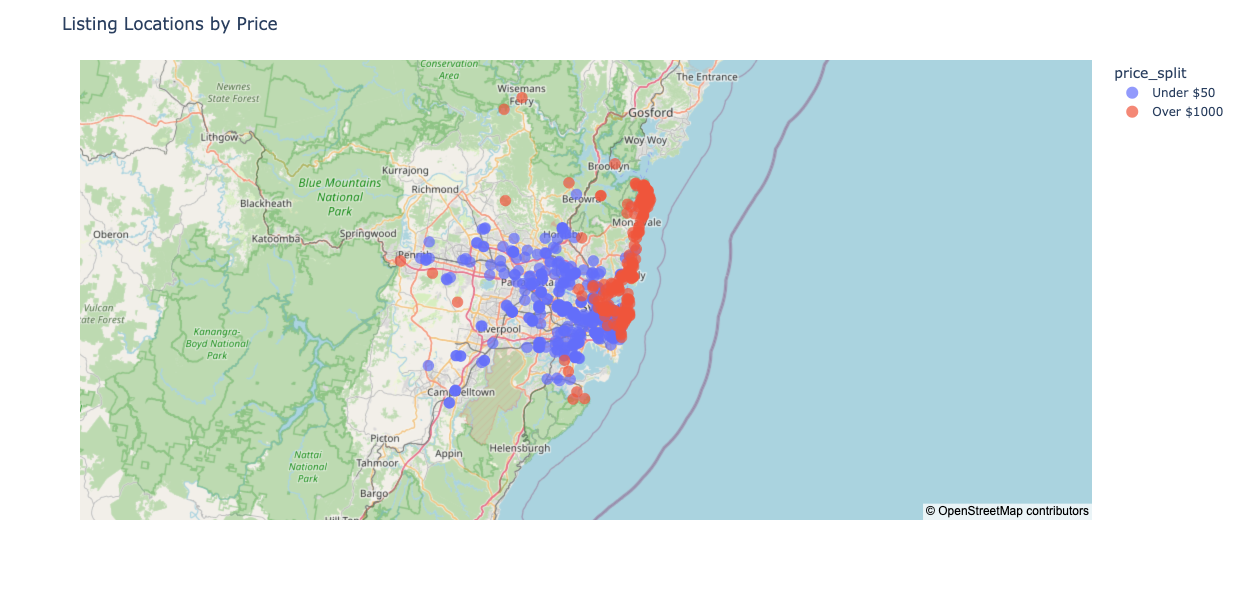

In [56]:
# update below price variable
price = 1000
very_exp = all_df[all_df['price']>price].copy()
very_cheap = all_df[all_df['price']<50].copy()
very_cheap['price_split'] = 'Under $50'
very_exp['price_split'] = f'Over ${price}'

combined = pd.concat([very_cheap, very_exp])

fig = px.scatter_mapbox(combined, lat="latitude", lon="longitude", width=1200, height=600, color = 'price_split', opacity = 0.7)
fig.update_layout(mapbox_style="open-street-map", title=f'Listing Locations by Price')
fig.update_traces(marker={'size': 12})
#fig.update_layout(title=f'Listing Locations: over ${price} & under $50')
fig.show()

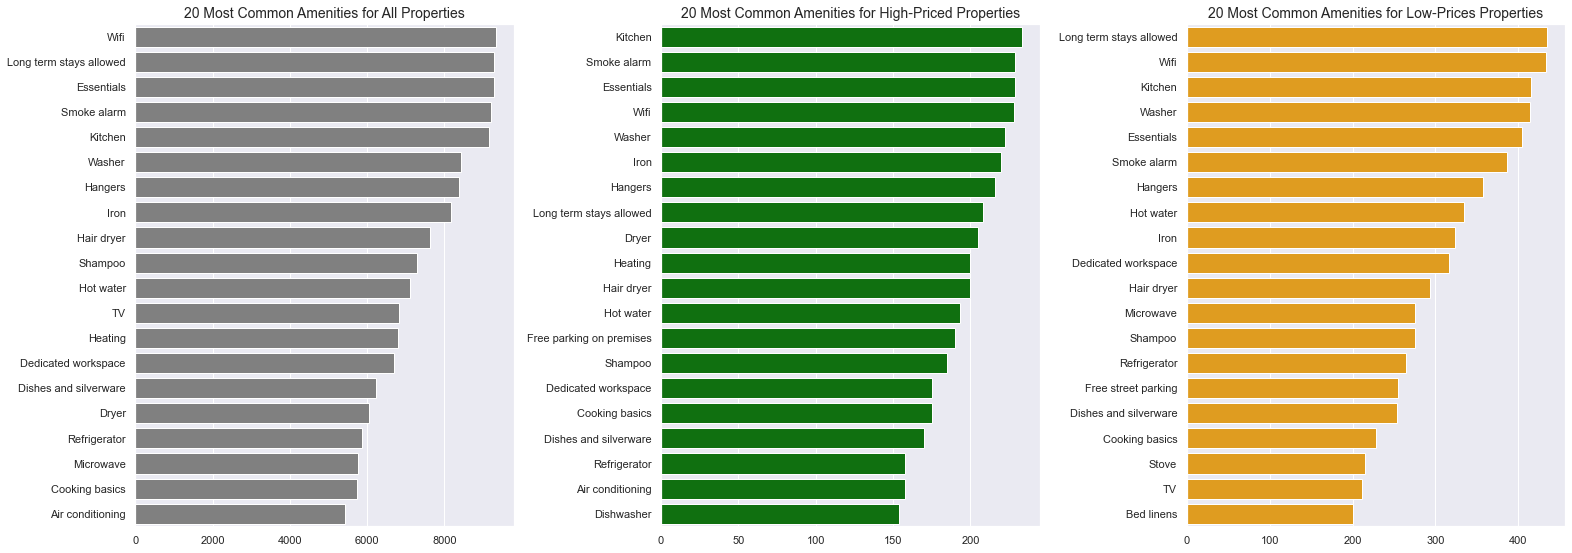

In [38]:
high_price_amen = all_df[all_df['price']>1000]['amenities'].copy().str.replace("\[|\]|\'", "").str.split(",")
low_price_amen = all_df[all_df['price']<50]['amenities'].copy().str.replace("\[|\]|\'", "").str.split(",")
all_amen = all_df["amenities"].str.replace("\[|\]|\'", "").str.split(",")

hp_amen_list = [] # high price amenities
lp_amen_list = [] # low price amenities
ap_amen_list = [] # all amenities

for amenity in high_price_amen.values.tolist():
    for each in amenity:
        hp_amen_list.append(each.replace('"', '').strip())        
hp_top_20_amen = pd.Series(hp_amen_list).value_counts().sort_values(ascending = False)[:20]

for amenity in low_price_amen.values.tolist():
    for each in amenity:
        lp_amen_list.append(each.replace('"', '').strip())
lp_top_20_amen = pd.Series(lp_amen_list).value_counts().sort_values(ascending = False)[:20]

for amenity in all_amen.values.tolist():
    for each in amenity:
        ap_amen_list.append(each.replace('"', '').strip())      
all_top_20_amen = pd.Series(ap_amen_list).value_counts().sort_values(ascending = False)[:20]

fig = plt.figure(figsize = (22,15))

fig.add_subplot(231)
sns.barplot(x = all_top_20_amen,
            y = all_top_20_amen.index, 
            color = 'grey')
plt.title('20 Most Common Amenities for All Properties', fontsize = 14)

fig.add_subplot(232)
sns.barplot(x = hp_top_20_amen,
            y = hp_top_20_amen.index, 
            color = 'green')
plt.title('20 Most Common Amenities for High-Priced Properties', fontsize = 14)

fig.add_subplot(233)
sns.barplot(x = lp_top_20_amen,
            y = lp_top_20_amen.index, 
            color = 'orange')
plt.title('20 Most Common Amenities for Low-Prices Properties', fontsize = 14)

plt.tight_layout()
plt.show()

First finds most common for high priced than the low priced amenities which do not show up in the high priced list



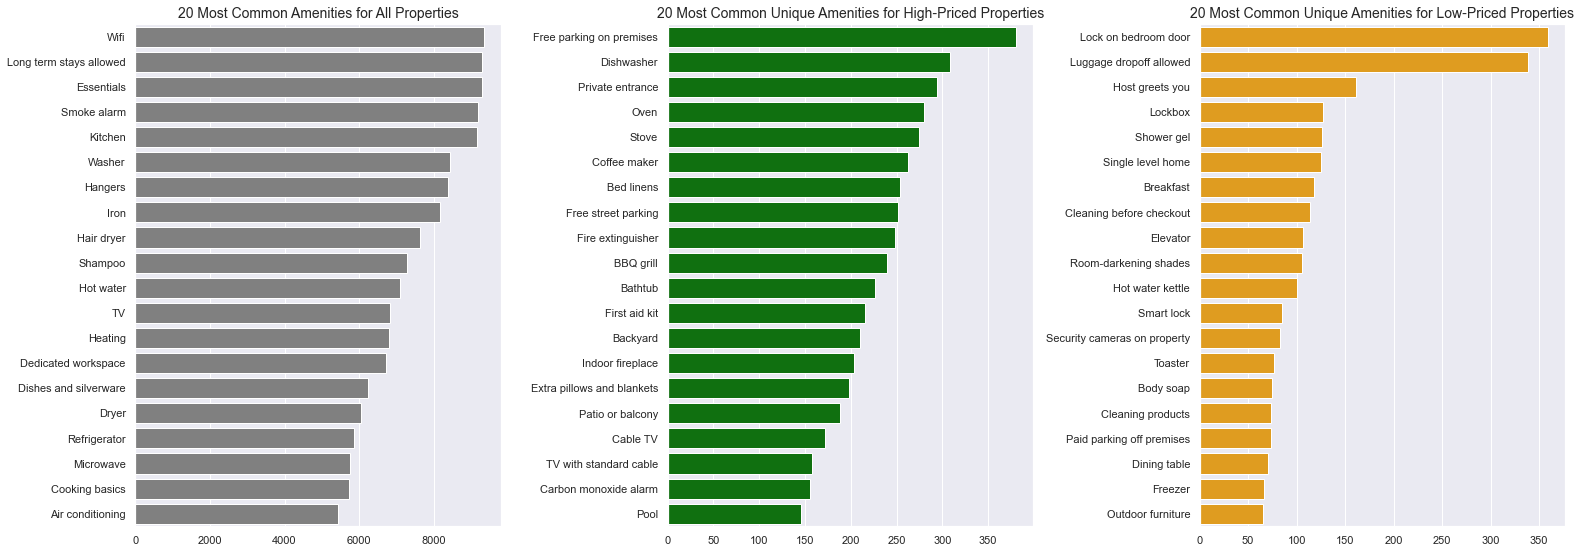

In [39]:
high_price_amen = all_df[all_df['price']>1000]['amenities'].copy().str.replace("\[|\]|\'", "").str.split(",")
low_price_amen = all_df[all_df['price']<70]['amenities'].copy().str.replace("\[|\]|\'", "").str.split(",")
all_amen = all_df["amenities"].str.replace("\[|\]|\'", "").str.split(",")

hp_amen_list = [] # high price amenities
lp_amen_list = [] # low price amenities
ap_amen_list = [] # all amenities

# all amenities
for amenity in all_amen.values.tolist():
    for each in amenity:
        ap_amen_list.append(each.replace('"', '').strip())      
all_top_20_amen = pd.Series(ap_amen_list).value_counts().sort_values(ascending = False)[:20]

# high priced amenities
for amenity in high_price_amen.values.tolist():
    for each in amenity:
        if each.replace('"', '').strip() not in list(all_top_20_amen.index):
            hp_amen_list.append(each.replace('"', '').strip())        
hp_top_20_amen = pd.Series(hp_amen_list).value_counts().sort_values(ascending = False)[:20]

exclude_amen = list(hp_top_20_amen.index).copy()
exclude_amen.extend(all_top_20_amen.index)

# low priced amenities
for amenity in low_price_amen.values.tolist():
    for each in amenity:
        if each.replace('"', '').strip() not in exclude_amen:
            lp_amen_list.append(each.replace('"', '').strip())
lp_top_20_amen = pd.Series(lp_amen_list).value_counts().sort_values(ascending = False)[:20]

exclude_amen = list(lp_top_20_amen.index).copy()
exclude_amen.extend(all_top_20_amen.index)

# high priced amenities that arent in the regular list or the low priced list
for amenity in high_price_amen.values.tolist():
    for each in amenity:
        if each.replace('"', '').strip() not in exclude_amen:
            hp_amen_list.append(each.replace('"', '').strip())        
hp_top_20_amen = pd.Series(hp_amen_list).value_counts().sort_values(ascending = False)[:20]


# create plot
fig = plt.figure(figsize = (22,15))

fig.add_subplot(231)
sns.barplot(x = all_top_20_amen,
            y = all_top_20_amen.index, 
            color = 'grey')
plt.title('20 Most Common Amenities for All Properties', fontsize = 14)

fig.add_subplot(232)
sns.barplot(x = hp_top_20_amen,
            y = hp_top_20_amen.index, 
            color = 'green')
plt.title('20 Most Common Unique Amenities for High-Priced Properties', fontsize = 14)

fig.add_subplot(233)
sns.barplot(x = lp_top_20_amen,
            y = lp_top_20_amen.index, 
            color = 'orange')
plt.title('20 Most Common Unique Amenities for Low-Priced Properties', fontsize = 14)

plt.tight_layout()
plt.savefig('unique_amenities.png', bbox_inches='tight')
print('First finds most common for high priced than the low priced amenities which do not show up in the high priced list\n')
plt.show()

First finds most common for low priced than the high priced amenities which do not show up in the low priced list



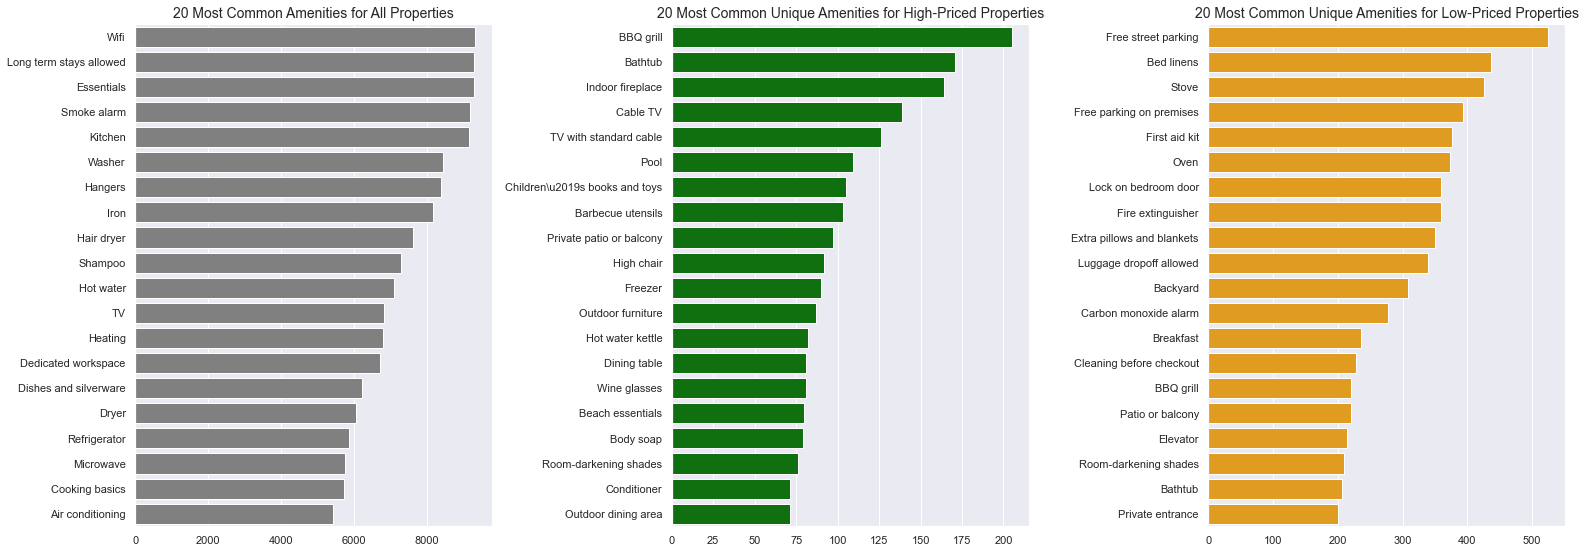

In [40]:
high_price_amen = all_df[all_df['price']>800]['amenities'].copy().str.replace("\[|\]|\'", "").str.split(",")
low_price_amen = all_df[all_df['price']<70]['amenities'].copy().str.replace("\[|\]|\'", "").str.split(",")
all_amen = all_df["amenities"].str.replace("\[|\]|\'", "").str.split(",")

hp_amen_list = [] # high price amenities
lp_amen_list = [] # low price amenities
ap_amen_list = [] # all amenities

# all amenities
for amenity in all_amen.values.tolist():
    for each in amenity:
        ap_amen_list.append(each.replace('"', '').strip())      
all_top_20_amen = pd.Series(ap_amen_list).value_counts().sort_values(ascending = False)[:20]

# low priced amenities
for amenity in low_price_amen.values.tolist():
    for each in amenity:
        if each.replace('"', '').strip() not in list(all_top_20_amen.index):
            lp_amen_list.append(each.replace('"', '').strip())
lp_top_20_amen = pd.Series(lp_amen_list).value_counts().sort_values(ascending = False)[:20]


exclude_amen = list(lp_top_20_amen.index).copy()
exclude_amen.extend(all_top_20_amen.index)

# high priced amenities
for amenity in high_price_amen.values.tolist():
    for each in amenity:
        if each.replace('"', '').strip() not in exclude_amen:
            hp_amen_list.append(each.replace('"', '').strip())        
hp_top_20_amen = pd.Series(hp_amen_list).value_counts().sort_values(ascending = False)[:20]


exclude_amen = list(lp_top_20_amen.index).copy()
exclude_amen.extend(all_top_20_amen.index)

# low priced amenities
for amenity in low_price_amen.values.tolist():
    for each in amenity:
        if each.replace('"', '').strip() not in exclude_amen:
            lp_amen_list.append(each.replace('"', '').strip())
lp_top_20_amen = pd.Series(lp_amen_list).value_counts().sort_values(ascending = False)[:20]


# create plot
fig = plt.figure(figsize = (22,15))

fig.add_subplot(231)
sns.barplot(x = all_top_20_amen,
            y = all_top_20_amen.index, 
            color = 'grey')
plt.title('20 Most Common Amenities for All Properties', fontsize = 14)

fig.add_subplot(232)
sns.barplot(x = hp_top_20_amen,
            y = hp_top_20_amen.index, 
            color = 'green')
plt.title('20 Most Common Unique Amenities for High-Priced Properties', fontsize = 14)

fig.add_subplot(233)
sns.barplot(x = lp_top_20_amen,
            y = lp_top_20_amen.index, 
            color = 'orange')
plt.title('20 Most Common Unique Amenities for Low-Priced Properties', fontsize = 14)

plt.tight_layout()
plt.savefig('unique_amenities.png', bbox_inches='tight')

print('First finds most common for low priced than the high priced amenities which do not show up in the low priced list\n')
plt.show()

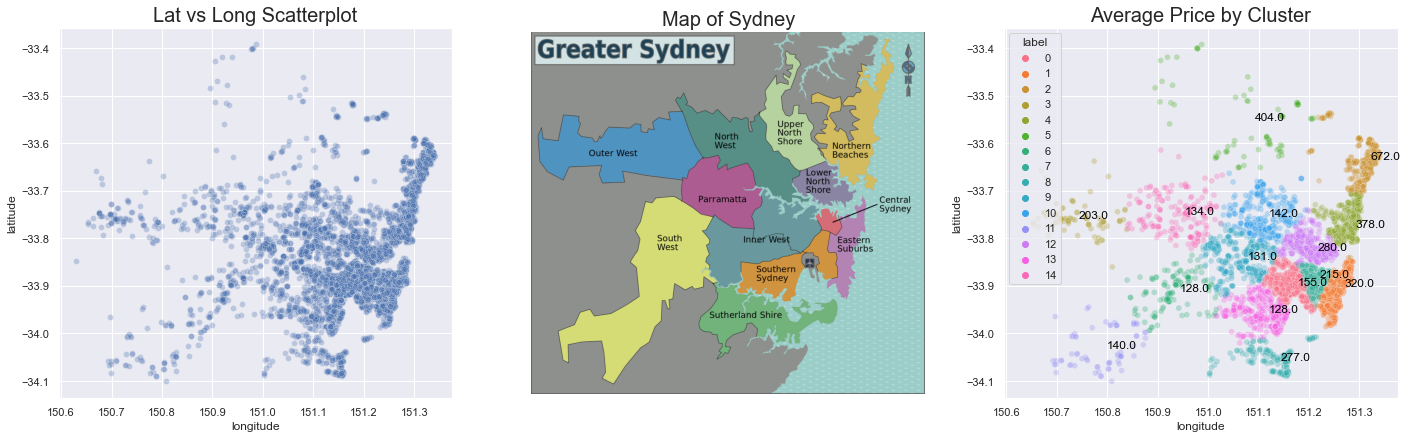

In [41]:
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
lat = all_df['latitude']
long = all_df['longitude']
img = mpimg.imread('syd.png')
km = KMeans(n_clusters = 15, n_init = 100).fit(all_df[['latitude', 'longitude']])
cluster_labels = pd.DataFrame(km.labels_)
cluster_labels.columns = ['label']
cluster_labels.head()

fig = plt.figure(figsize = (24,15))

fig.add_subplot(231)
plt.title('Lat vs Long Scatterplot', fontdict = {'fontsize' : 20})
sns.scatterplot(long, lat, alpha = 0.3)

fig.add_subplot(232)
plt.title('Map of Sydney', fontdict = {'fontsize' : 20})
plt.axis('off')
plt.imshow(img)

fig.add_subplot(233)
plt.title('Average Price by Cluster', fontdict = {'fontsize' : 20})
sns.scatterplot(long, lat, hue = cluster_labels['label'].astype('category'), alpha = 0.3)
centroids  = pd.DataFrame(km.cluster_centers_) # find lat and long of cluster centroids
cluster_prices = pd.DataFrame(all_df['price']).join(pd.DataFrame(cluster_labels)) # get mean price for each cluster
cluster_price_loc = cluster_prices.groupby('label').mean().round().join(centroids) # join dataframes

for co_ord in range(0,cluster_price_loc.shape[0]):
     plt.text(x = cluster_price_loc[1][co_ord]+0.01, 
              y = cluster_price_loc[0][co_ord], 
              s = cluster_price_loc['price'][co_ord], 
              horizontalalignment='left', size='medium', color='black')

plt.savefig('latlong_model.png', bbox_inches='tight')
plt.show()

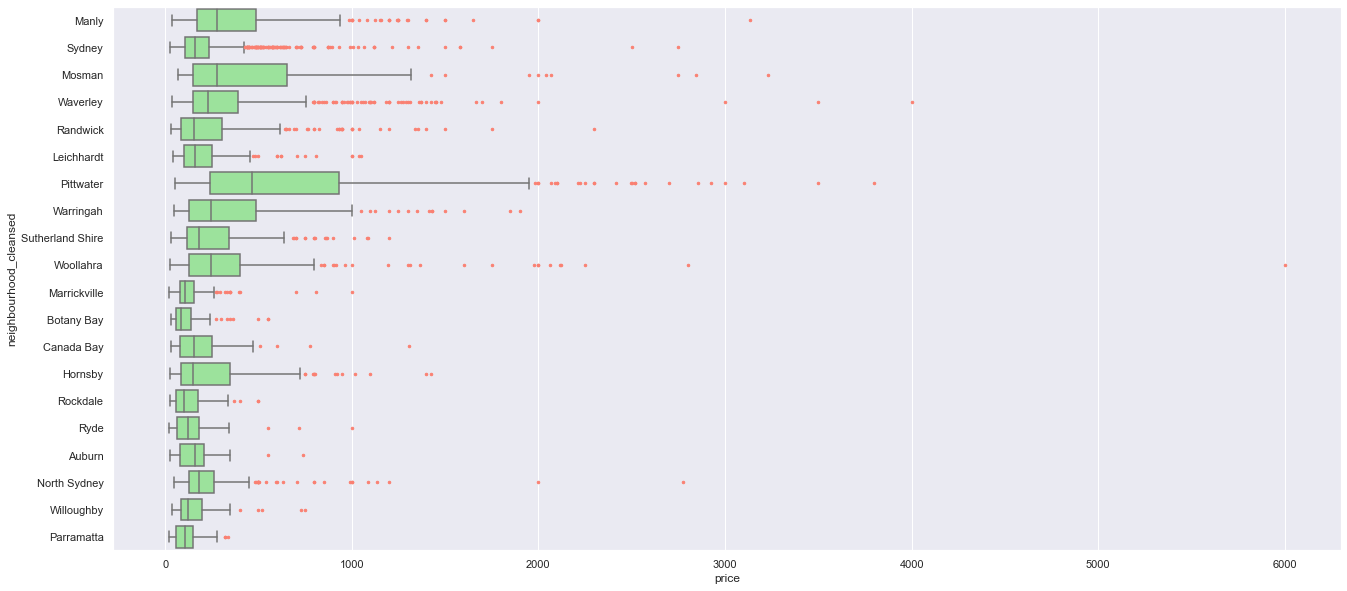

In [42]:
fig = plt.figure(figsize = (22,10))
colors = dict(markerfacecolor = 'salmon', markeredgecolor = 'salmon', marker = '.')

# get top 20 suburbs into new df
pop_suburbs = list(all_df['neighbourhood_cleansed'].value_counts()[:20].index)
xxx = all_df[all_df['neighbourhood_cleansed'].isin(pop_suburbs)].copy()

# plot boxplots
sns.boxplot(data = xxx,
           y = 'neighbourhood_cleansed', x = 'price', flierprops = colors, color = 'lightgreen')
plt.show()

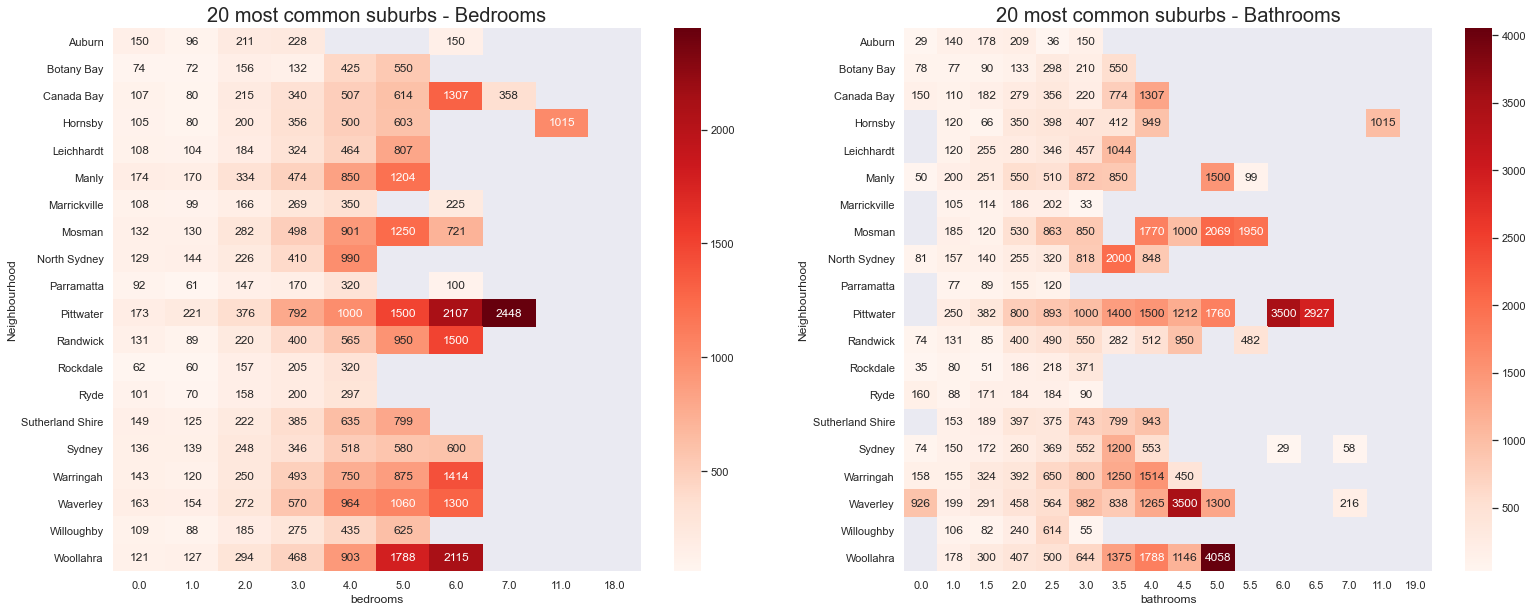

In [43]:
fig = plt.figure(figsize = (26,10))
fig.add_subplot(121)
sns.heatmap(xxx.groupby(['neighbourhood_cleansed', 'bedrooms'])['price'].median().unstack(), cmap = 'Reds', annot = True, fmt='.0f')
plt.gca().set_title('20 most common suburbs - Bedrooms', fontsize = 20)
plt.ylabel('Neighbourhood')

fig.add_subplot(122)
sns.heatmap(xxx.groupby(['neighbourhood_cleansed', 'bathrooms'])['price'].median().unstack(), cmap = 'Reds', annot = True, fmt='.0f')
plt.gca().set_title('20 most common suburbs - Bathrooms', fontsize = 20)
plt.ylabel('Neighbourhood')
plt.show()

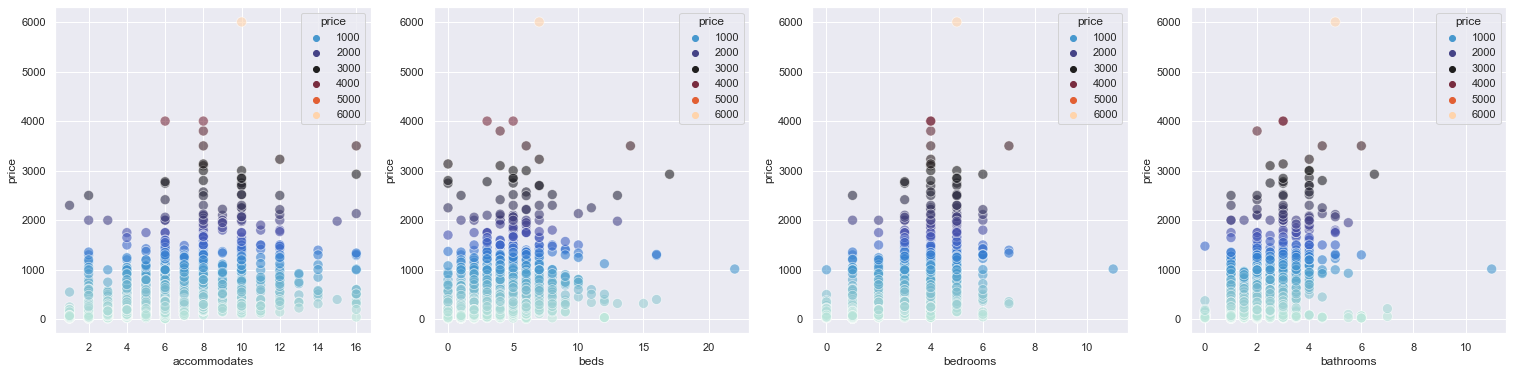

In [44]:
fig = plt.figure(figsize = (26,6))

fig.add_subplot(141)
sns.scatterplot(data = all_df,
               x = 'accommodates',
               y = 'price',
               hue = 'price', s = 100, alpha = 0.6, palette = 'icefire')
fig.add_subplot(142)
sns.scatterplot(data = all_df,
               x = 'beds',
               y = 'price',
               hue = 'price', s = 100, alpha = 0.6, palette = 'icefire')
fig.add_subplot(143)
sns.scatterplot(data = all_df,
               x = 'bedrooms',
               y = 'price',
               hue = 'price',s=100, alpha = 0.6, palette = 'icefire')
fig.add_subplot(144)
sns.scatterplot(data = all_df,
               x = 'bathrooms',
               y = 'price',
               hue = 'price', s = 100, alpha = 0.6, palette = 'icefire')
plt.show()

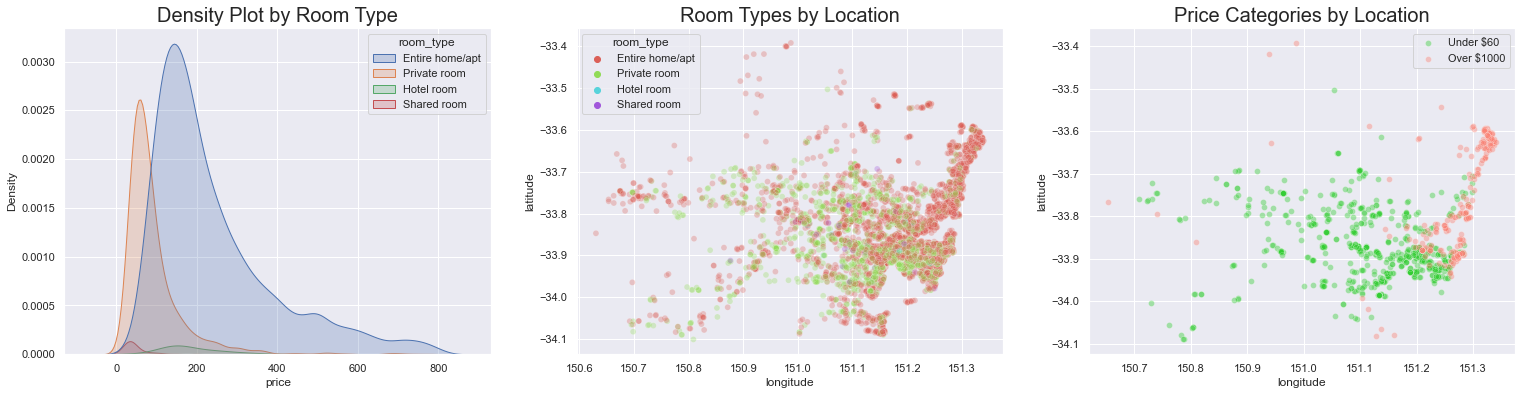

In [45]:
fig = plt.figure(figsize = (26, 6))

fig.add_subplot(131)
under_800 = all_df[all_df['price']<800]
sns.kdeplot(under_800['price'], hue = all_df['room_type'], fill = True)
plt.gca().set_title('Density Plot by Room Type', fontsize = 20)

fig.add_subplot(132)
sns.scatterplot(all_df['longitude'], all_df['latitude'], hue = all_df['room_type'], alpha = 0.3, palette = 'hls')
plt.gca().set_title('Room Types by Location', fontsize = 20)

fig.add_subplot(133)
under_60 = all_df[all_df['price']<60].copy()
over_1000 = all_df[all_df['price']>1000].copy()
sns.scatterplot(under_60['longitude'], under_60['latitude'], color = 'limegreen', label = 'Under $60', alpha = 0.4)
sns.scatterplot(over_1000['longitude'], over_1000['latitude'], color = 'salmon', label = 'Over $1000', alpha = 0.4)
plt.legend()
plt.gca().set_title('Price Categories by Location', fontsize = 20)


plt.show()

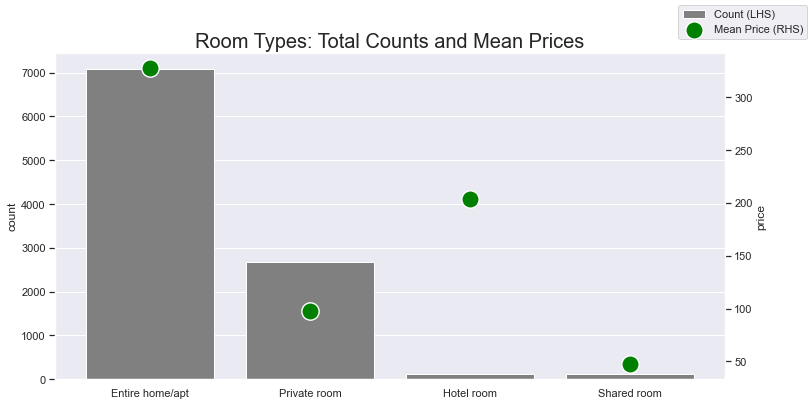

In [46]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(x = all_df['room_type'].value_counts().index,
            y = all_df['room_type'].value_counts(),
            color='grey', label = 'Count (LHS)', ax = ax1) #palette = 'Dark2')
plt.ylabel('count')

ax2 = ax1.twinx()
room_type_mean_prices = all_df[['room_type', 'price']].groupby('room_type').mean().round().reindex(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'])
#room_type_mean_prices['price'].plot(ax = ax2, kind = 'scatter')
sns.scatterplot(x = room_type_mean_prices.index, y = room_type_mean_prices['price'], ax = ax2, label = 'Mean Price (RHS)', s = 300, color = 'green')
ax2.grid(None)

plt.title('Room Types: Total Counts and Mean Prices', fontdict = {'fontsize' : 20})
ax2.get_legend().remove()
fig.legend()
plt.show()

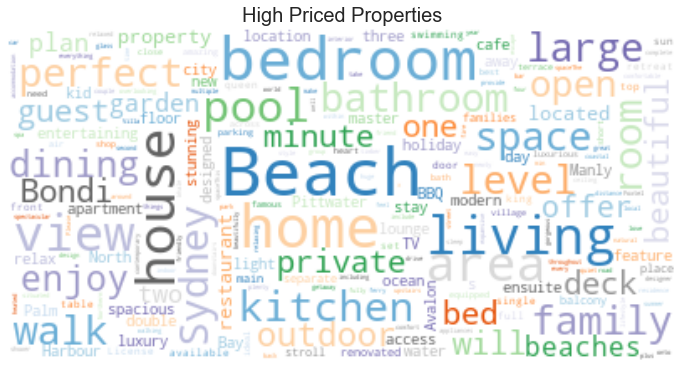

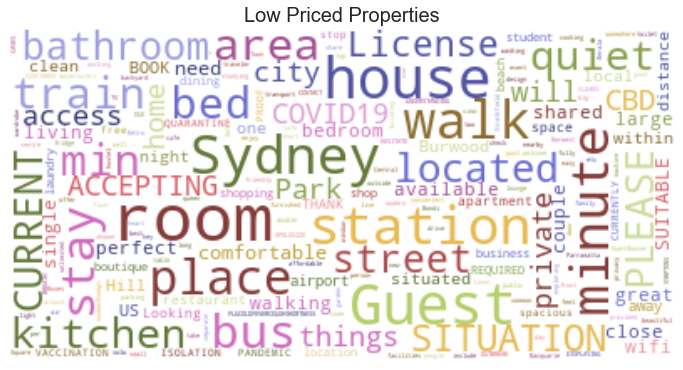

In [47]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

high_price_desc = clean_desc(all_df[(all_df['price']>1000) & (all_df['description'].notnull())]["description"])
low_price_desc = clean_desc(all_df[(all_df['price']<40) & (all_df['description'].notnull())]["description"])
#all_desc = clean_desc(all_df[all_df['description'].notnull()]["description"])

hp_text = " ".join(desc for desc in high_price_desc)
lp_text = " ".join(desc for desc in low_price_desc)

#fig.add_subplot(121)
wordcloud = WordCloud(max_font_size=40, max_words=400, background_color="white",
                     colormap='tab20c', collocations=False, stopwords = STOPWORDS).generate(hp_text)
plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('High Priced Properties', fontdict = {'fontsize' : 20})
plt.axis("off")

#fig.add_subplot(122)
wordcloud2 = WordCloud(max_font_size=40, max_words=400, background_color="white",
                      colormap='tab20b', collocations=False, stopwords = STOPWORDS).generate(lp_text)
plt.figure(figsize = (12,12))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.title('Low Priced Properties', fontdict = {'fontsize' : 20})
plt.axis("off")

plt.show()

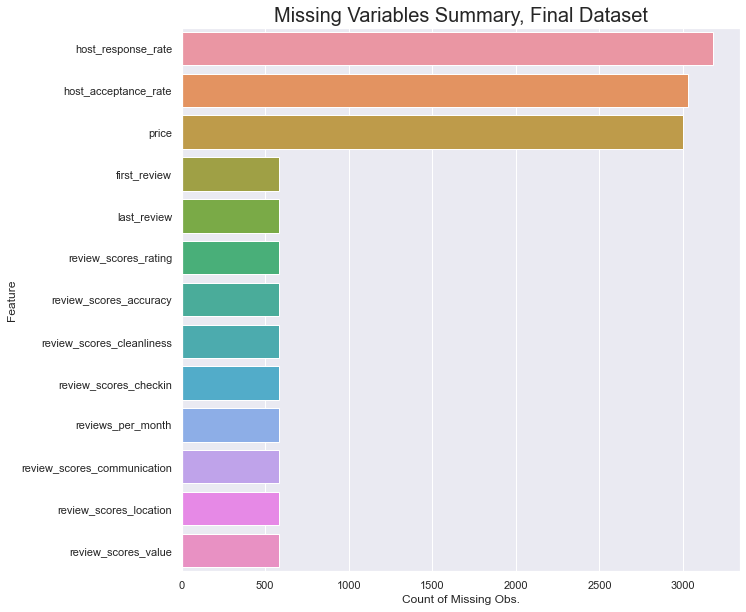

In [48]:
all_missing_vars = new_df_dums.isnull().sum().sort_values(ascending = False)[new_df_dums.isnull().sum()>0]
sns.barplot(x = all_missing_vars,
           y = all_missing_vars.index)
plt.xlabel('Count of Missing Obs.'); plt.ylabel('Feature')
plt.title('Missing Variables Summary, Final Dataset', fontsize = 20)
plt.show()

`(Task 2, Question 6 Text Here - insert more cells as required)`

--- 
## Task 3: Fit and tune a forecasting model/Submit predictions/Report score and ranking

Make sure you **clearly explain each step** you do, both in text and on the recoded video.

1. Build a machine learning (ML) regression model taking into account the outcomes of Tasks 1 & 2
2. Fit the model and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly
3. Create predictions using the test dataset and submit your predictions on Kaggle's competition page
4. Provide Kaggle ranking and **score** (screenshot your best submission) and comment
5. Make sure your Python code works, so that a marker that can replicate your all of your results and obtain the same MSE from Kaggle

- Hint: to perform well you will need to iterate Task 3, building and tuning various models in order to find the best one.

Total Marks: 11

In [49]:
from xgboost import XGBRegressor

# remove weak and multicollinear features
cols_to_drop = ['host_response_rate', 'beds', 'availability_365', 'review_scores_rating', 'amen_bbq', 'sub_Leichhardt', 'sub_Willoughby', 'sub_Ashfield', 'desc_transport', 'neigh_sentiment']

sample_X_train = X_train.drop(cols_to_drop, axis = 'columns').copy()
samp_cols = sample_X_train.columns
sample_X_test = X_test[samp_cols].copy()

xgb = XGBRegressor(learning_rate = 0.01, max_depth = 3, min_child_weight = 4, n_estimators = 1000, seed = 49)
xgb.fit(sample_X_train.fillna(0), y_train)
y_pred = xgb.predict(sample_X_test.fillna(0))

# fix gremlins
y_pred[y_pred<20] = 20

Above is the final model with our tuned hyperparameters.

https://medium.com/gousto-engineering-techbrunch/the-problem-with-gradient-boosting-gradient-boosted-gremlins-a69908dcea94  
https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook  
https://www.youtube.com/watch?v=GrJP9FLV3FE&ab_channel=StatQuestwithJoshStarmer

In [50]:
from sklearn.model_selection import cross_val_score

xgb_cv_score = cross_val_score(xgb, sample_X_train.fillna(0), y_train, cv=4, scoring='neg_mean_squared_error')
print(xgb_cv_score)

[-35169.59933746 -33360.09276386 -41885.1736174  -30728.75071741]


In [51]:
submission_dictionary = {
    'ID': list(range(7000,10000)),
    'price': y_pred
}
submission = pd.DataFrame(submission_dictionary)
submission.to_csv('submission.csv', index = False)

Below is the method we used for hyperparameter tuning in the earlier stages. I took the approach of multiple rounds and exploring which particular range gave the best results then narrowed in on that range further for a second round. I also manually tweaked some in further testing since continually adding and removing features meant that some hyperparameters in fact worked better than we previously found in our tuning code.  

The code below was copied from another workbook we tested in and will not be re-run here as it takes too long.

In [52]:
# ROUND 1

# from sklearn.model_selection import GridSearchCV

# hyperparameter_grid = [{
#     'n_estimators': [100, 400, 800],
#     'max_depth': [3, 6, 9],
#     'learning_rate': [0.05, 0.1, 0.001],
#     'min_child_weight': [1, 10, 100]
#     }]

# GS_CV = GridSearchCV(estimator=xgb,      # initialise gs object
#                   param_grid=hyperparameter_grid, 
#                   scoring='neg_mean_squared_error', 
#                   refit=True,              # this will refit the best estimator to the whole dataset automatically
#                   cv=4,
#                   n_jobs=4)


# GS_CV = GS_CV.fit(X_train, y_train)            # fit gs

# print(GS_CV.best_score_)

# print(GS_CV.best_params_)


In [53]:
# ROUND 2

# from sklearn.model_selection import GridSearchCV

# hyperparameter_grid = [{
#     'n_estimators': [800, 1000, 1500],
#     'max_depth': [2, 3, 4],
#     'learning_rate': [0.05, 0.1, 0.001],
#     'min_child_weight': [2, 4, 6]
#     }]

# GS_CV = GridSearchCV(estimator=xgb,      # initialise gs object
#                   param_grid=hyperparameter_grid, 
#                   scoring='neg_mean_squared_error', 
#                   refit=True,              # this will refit the best estimator to the whole dataset automatically
#                   cv=4,
#                   verbose = 2,         # shows us fitting process
#                   n_jobs=4)


# GS_CV = GS_CV.fit(X_train, y_train, early_stopping_rounds = 10)            # fit gs

# print(GS_CV.best_score_)

# print(GS_CV.best_params_)

In [54]:
# best_classifier = GS_CV.best_estimator_                # copy best estimator

# print(best_classifier)

A variety of models were chosen but I decided to settle on XGBoost since it has a reputation for Kaggle datasets in tabular form but also because it's one of the best regression models that can capture non linear relationships.  

I also tried using a voting regressor with the top 4 model types including Random Forest, Gradient Boosting Machine, stock XGBoost and another tuned XGBoost. This did not lead to material improvements in model performance.

<table><tr>
<td> <img src="GroupAssignment/models1.png" alt="Drawing" style="width: 550px;"/> </td>
<td> <img src="GroupAssignment/models2.png" alt="Drawing" style="width: 550px;"/> </td>
</tr></table>

Below code also helped with feature selection as it randomly removes 15 features each time. This gave us an additional measure to improve feature selection process as XGBoost only does this to some degree.

In [55]:
# sample_X_train = X_train.drop('dist', axis = 'columns').sample(n = len(X_train.columns)-15, axis = 'columns').copy()
# samp_cols = sample_X_train.columns
# sample_X_test = X_test[samp_cols].copy()